### Problem Statement :

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International have been able to raise around $ 10 million. This money now needs to be allocated strategically and effectively. Hence, inorder to decide the selection of the countries that are in the direst need of aid, data driven decisions are to be made. Thus, it becomes necessary to categorise the countries using socio-economic and health factors that determine the overall development of the country. Thus, based on these clusters of the countries depending on their conditions, funds will be allocated for assistance during the time of disasters and natural calamities. It is a clear cut case of unsupervised learning where we have to create clusters of the countries based on the different feature present.

### Aim :
- To cluster countries based on numerical features.
- It is an **Unsupervised Learning** problem statement.

### <center>Dataset Attributes</center>
    
- **country** : Name of the country
- **child_mort** : Death of children under 5 years of age per 1000 live births
- **exports** : Exports of goods and services per capita. Given as %age of the GDP per capita
- **health** : Total health spending per capita. Given as %age of GDP per capita
- **imports** : Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income** : Net income per person
- **Inflation** : The measurement of the annual growth rate of the Total GDP
- **life_expec** : The average number of years a new born child would live if the current mortality patterns are to rem...
- **total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain th...
- **gdpp** : The GDP per capita. Calculated as the Total GDP divided by the total population.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew,norm
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido

## Reading DataFrame

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan       90.20    10.00    7.58    44.90    1610   
1              Albania       16.60    28.00    6.55    48.60    9930   
2              Algeria       27.30    38.40    4.17    31.40   12900   
3               Angola      119.00    62.30    2.85    42.90    5900   
4  Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44       56.20       5.82    553  
1       4.49       76.30       1.65   4090  
2      16.10       76.50       2.89   4460  
3      22.40       60.10       6.16   3530  
4       1.44       76.80       2.13  12200

In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.dtypes.value_counts()

float64    7
int64      2
object     1
dtype: int64

In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Finding missing/Nan/Duplicate values

In [7]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df.duplicated().sum()

0

- NO missing or Nan Values and duplicated values

In [9]:
for col in df.columns:
    print(df[col].value_counts())

Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: country, Length: 167, dtype: int64
4.50      4
3.20      3
24.10     3
4.20      3
111.00    3
         ..
55.20     1
19.20     1
29.10     1
25.10     1
83.10     1
Name: child_mort, Length: 139, dtype: int64
23.80    3
35.00    3
37.00    2
12.40    2
14.90    2
        ..
85.80    1
21.30    1
27.90    1
22.70    1
30.00    1
Name: exports, Length: 147, dtype: int64
5.07    3
5.20    3
6.91    2
9.01    2
5.25    2
       ..
2.66    1
4.48    1
4.66    1
8.06    1
5.89    1
Name: health, Length: 147, dtype: int64
28.00    2
49.60    2
26.80    2
51.30    2
63.60    2
        ..
68.70    1
23.30    1
46.60    1
26.60    1
30.90    1
Name: imports, Length: 151, dtype: int64
28300    2
36200    2
1390     2
28700    2
15400    2
        ..
1660     1
6730     1
40400    1
3060     1
3280     1
N

In [10]:
df.describe().T['mean']

child_mort      38.27
exports         41.11
health           6.82
imports         46.89
income       17144.69
inflation        7.78
life_expec      70.56
total_fer        2.95
gdpp         12964.16
Name: mean, dtype: float64

## Exploratory Data Analysis

In [11]:
num_col=df.select_dtypes(['int','float']).columns
num_col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Skewness of child_mort: 1.4377099895432177
Skewness of exports: 2.423800483638185
Skewness of health: 0.6993911357163372
Skewness of imports: 1.8881195873370953
Skewness of income: 2.2113861590702943
Skewness of inflation: 5.107639513051106
Skewness of life_expec: -0.9622522128712052
Skewness of total_fer: 0.9583834645138499
Skewness of gdpp: 2.198078917626554


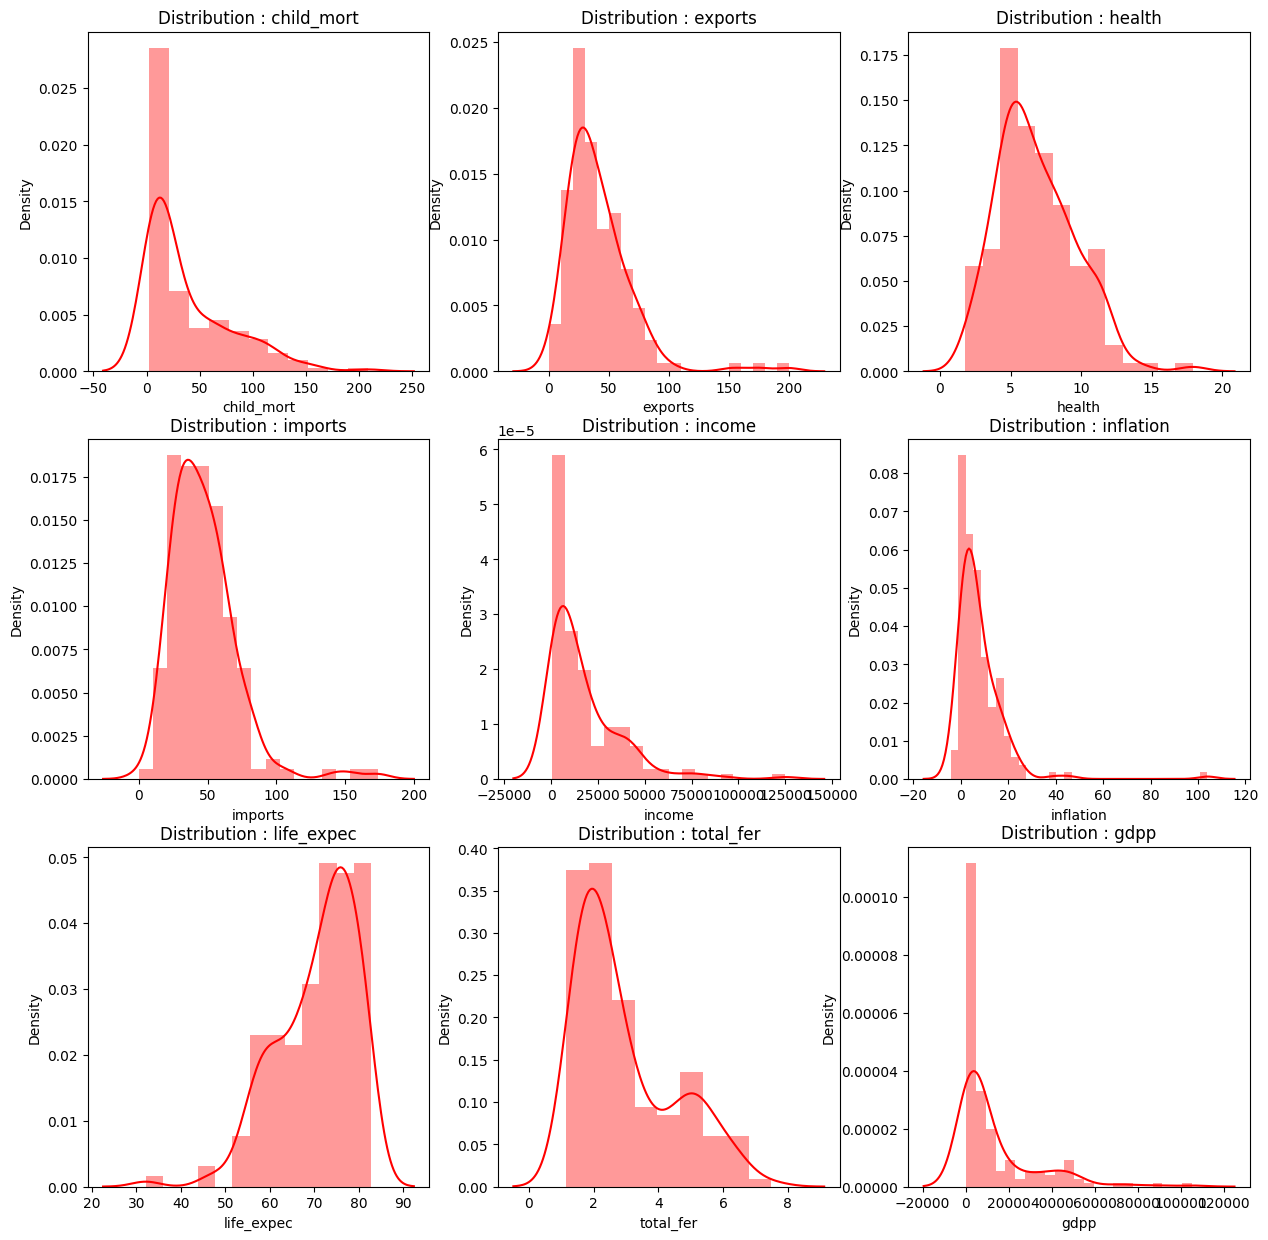

In [12]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    print(f'Skewness of {num_col[i]}: {skew(df[num_col[i]])}')
    sns.distplot(df[num_col[i]],color = 'red')
    title = 'Distribution : ' + num_col[i]
    plt.title(title)
plt.show()

- **life_expec** displays a **left or negatively skewed data distribution**.
- **health** displays a **normally distrubuted data**.
- All the remaining features show a **right or positively skewed data distribution**.
- Data distribution of **country** is not put out as it has text data and it has the same number of unique values as the length of the dataframe.

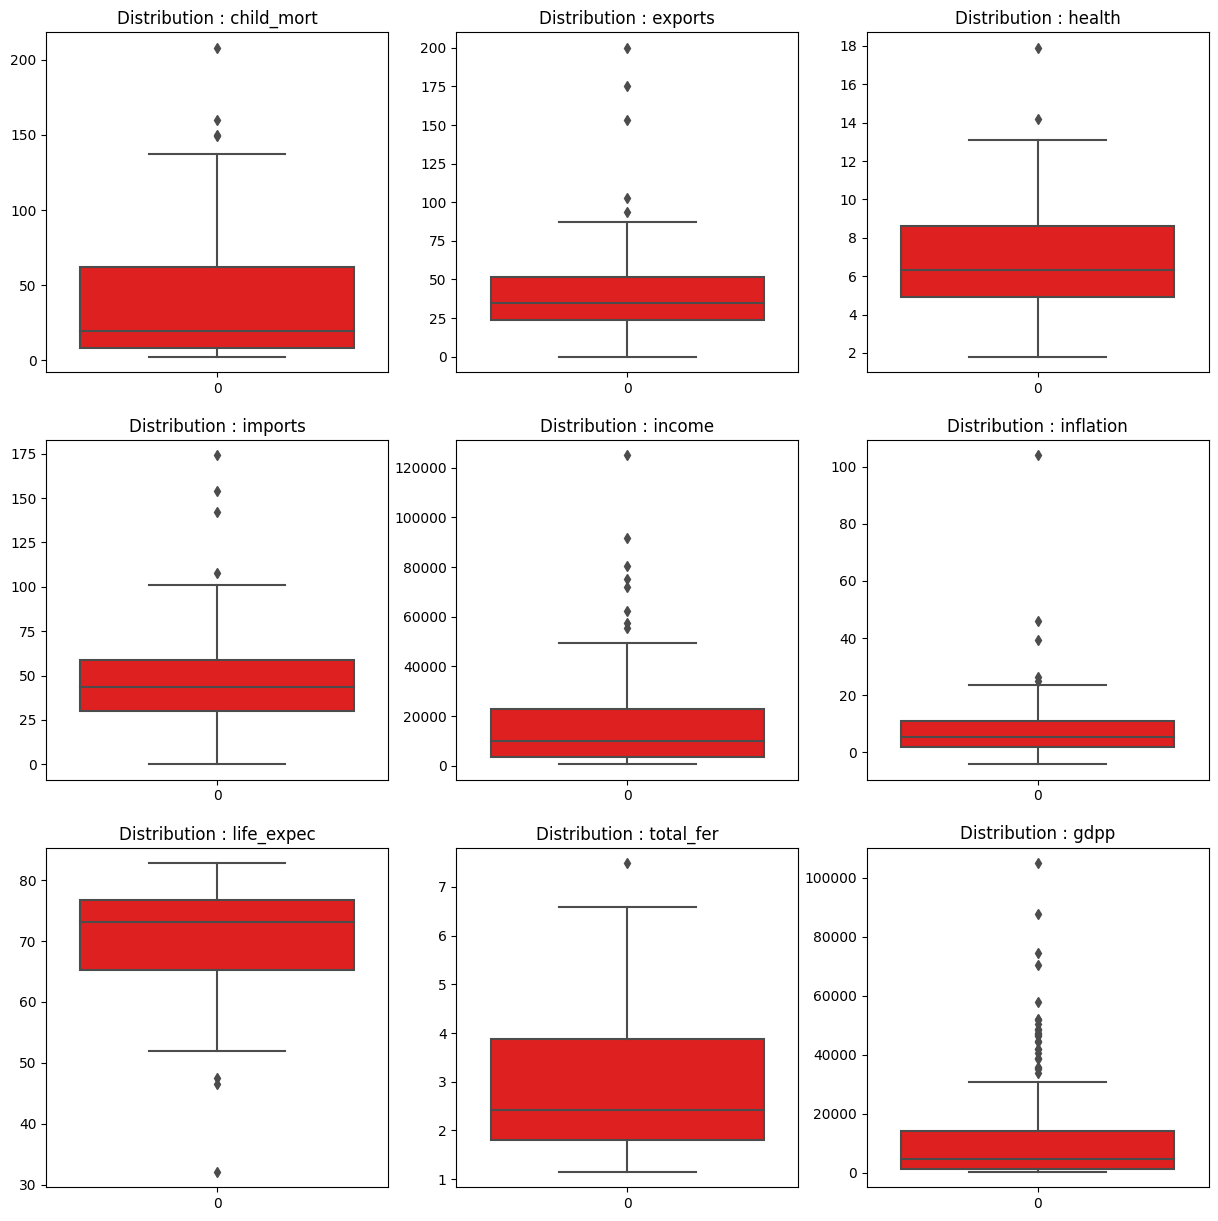

In [13]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[num_col[i]],color = 'red')
    title = 'Distribution : ' + num_col[i]
    plt.title(title)
plt.show()

In [14]:
len(df['country'].unique()) == len(df)

True

## child_mort

child_mort : Death of children under 5 years of age per 1000 live births

- child_mort : Economically backward nations have a high infant mortality rate!

In [15]:
df['child_mort']

0      90.20
1      16.60
2      27.30
3     119.00
4      10.30
       ...  
162    29.20
163    17.10
164    23.30
165    56.30
166    83.10
Name: child_mort, Length: 167, dtype: float64

In [16]:
df['child_mort'].describe()

count   167.00
mean     38.27
std      40.33
min       2.60
25%       8.25
50%      19.30
75%      62.10
max     208.00
Name: child_mort, dtype: float64

<AxesSubplot: ylabel='country'>

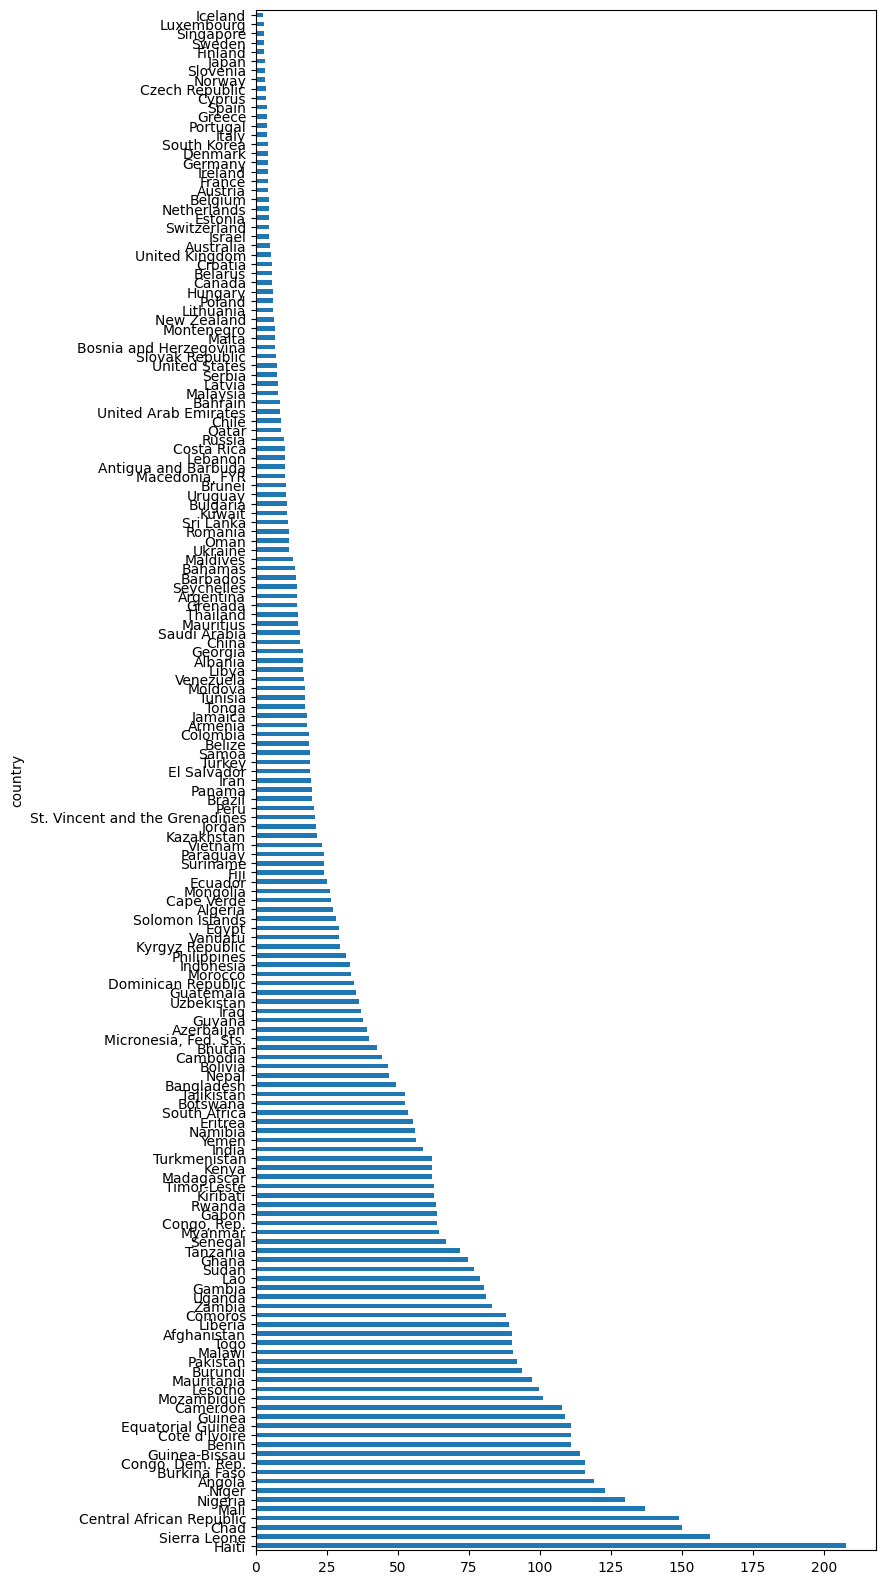

In [17]:
plt.figure(figsize=(8,20))
df.groupby('country')['child_mort'].sum().sort_values(ascending=False).plot(kind='barh')

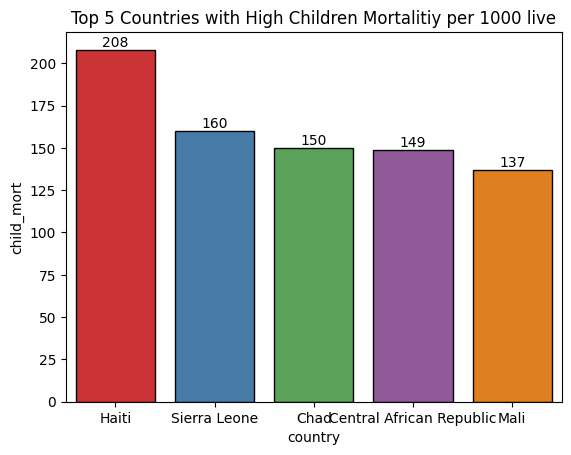

In [18]:
#fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
#plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = df.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette ='Set1',edgecolor = 'black');
plt.title('Top 5 Countries with High Children Mortalitiy per 1000 live')

for container in ax.containers:
    ax.bar_label(container)

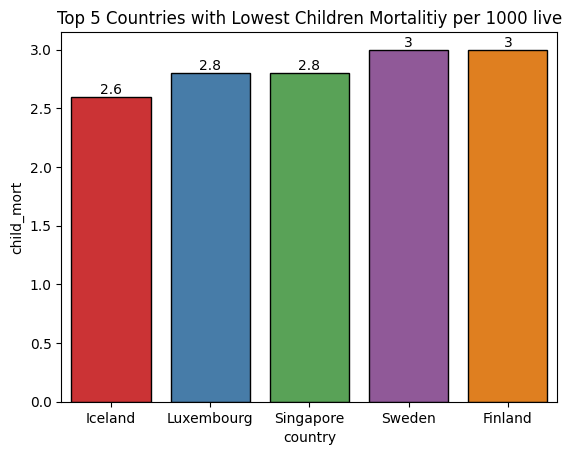

In [19]:
ax = sns.barplot(x = 'country',y = 'child_mort', data = df.sort_values(ascending = False,by = 'child_mort').iloc[167:161:-1],palette ='Set1',edgecolor = 'black');
plt.title('Top 5 Countries with Lowest Children Mortalitiy per 1000 live')

for container in ax.containers:
    ax.bar_label(container)

- Haiti has the highest children's deaths. African countries have significant positions in this statistic.
- At the other extreme of child_mort, countries from Asia and Europe has some solid presence.

## exports

- exports : Exports of goods and services per capita. Given as %age of the GDP per capita

In [20]:
df['exports'].describe()

count   167.00
mean     41.11
std      27.41
min       0.11
25%      23.80
50%      35.00
75%      51.35
max     200.00
Name: exports, dtype: float64

In [21]:
df['exports'].value_counts()

23.80    3
35.00    3
37.00    2
12.40    2
14.90    2
        ..
85.80    1
21.30    1
27.90    1
22.70    1
30.00    1
Name: exports, Length: 147, dtype: int64

In [22]:
df[['country','exports']].sort_values(by='exports')

country  exports
107      Myanmar     0.11
149  Timor-Leste     2.20
50       Eritrea     4.79
26       Burundi     8.92
109        Nepal     9.58
..           ...      ...
131   Seychelles    93.80
73       Ireland   103.00
98         Malta   153.00
91    Luxembourg   175.00
133    Singapore   200.00

[167 rows x 2 columns]

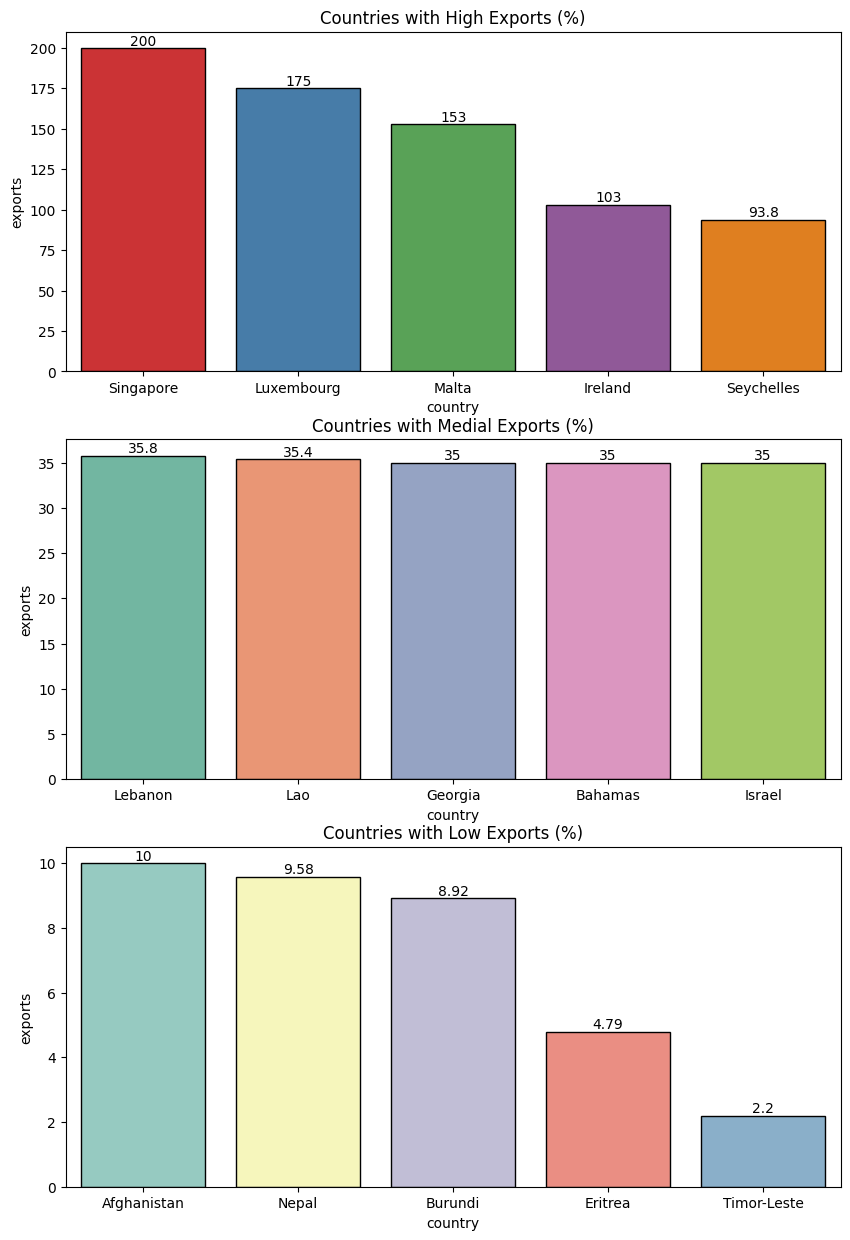

In [23]:
fig = plt.subplots(nrows = 3,ncols = 1,figsize = (10,15))
plt.subplot(3,1,1)
ax = sns.barplot(x = 'country',y = 'exports', data = df.sort_values(ascending = False,by = 'exports').iloc[:5],palette ="Set1",edgecolor = 'black');
plt.title('Countries with High Exports (%)')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)


plt.subplot(3,1,2)
ax = sns.barplot(x = 'country',y = 'exports', data = df.sort_values(ascending = False,by = 'exports').iloc[81:86],palette = "Set2",edgecolor = 'black');
plt.title('Countries with Medial Exports (%)')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)

plt.subplot(3,1,3)
ax = sns.barplot(x = 'country',y = 'exports', data = df.sort_values(ascending = False,by = 'exports').iloc[161:166],palette ="Set3",edgecolor = 'black');
plt.title('Countries with Low Exports (%)')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
plt.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

#### Export refers to a product or service produced in one country but sold to a buyer abroad. Exports are one of the oldest forms of economic transfer and occur on a large scale between nations.

- Singapore country have the high percentage of exports then followed by Luxenburg, Malta,Ireland,Seychelles.
- Timore-Leste have the lowest percentage of export GDP per capita around 2.2%.
- Afghanistan & Nepal are present in the lower end of exports. Geographical locations of these nations have a heavy influence. Countries with lower exports also have small geographical area.

## health

- health : Total health spending per capita. Given as %age of GDP per capita

In [24]:
df['health']

0     7.58
1     6.55
2     4.17
3     2.85
4     6.03
      ... 
162   5.25
163   4.91
164   6.84
165   5.18
166   5.89
Name: health, Length: 167, dtype: float64

In [25]:
df['health'].describe()

count   167.00
mean      6.82
std       2.75
min       1.81
25%       4.92
50%       6.32
75%       8.60
max      17.90
Name: health, dtype: float64

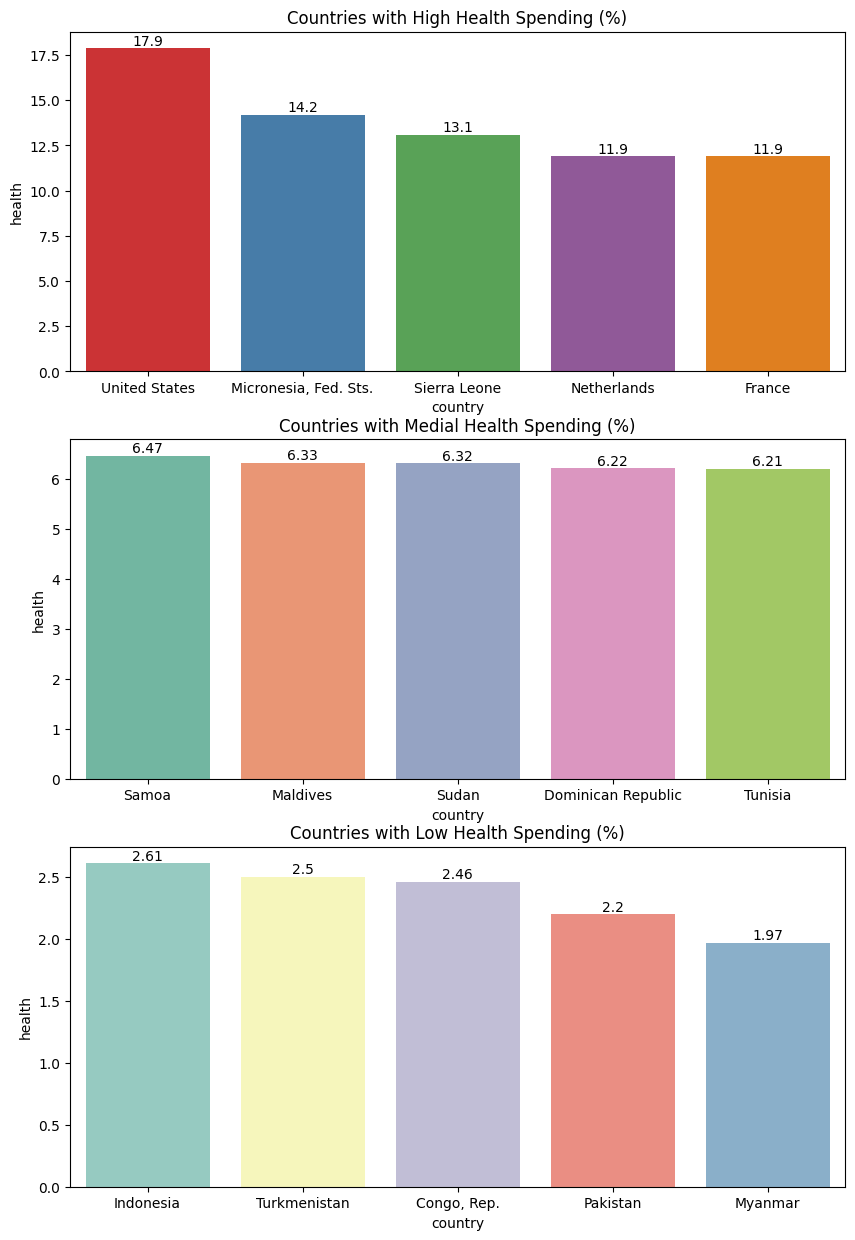

In [26]:
fig = plt.subplots(nrows = 3,ncols = 1,figsize = (10,15))
plt.subplot(3,1,1)
ax = sns.barplot(x = 'country',y = 'health', data = df.sort_values(ascending = False,by = 'health').iloc[:5],palette = "Set1");
plt.title('Countries with High Health Spending (%)')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)

plt.subplot(3,1,2)
ax = sns.barplot(x = 'country',y = 'health', data = df.sort_values(ascending = False,by = 'health').iloc[81:86],palette ="Set2");
plt.title('Countries with Medial Health Spending (%)')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)

plt.subplot(3,1,3)
ax = sns.barplot(x = 'country',y = 'health', data = df.sort_values(ascending = False,by = 'health').iloc[161:166],palette ="Set3");
plt.title('Countries with Low Health Spending (%)')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    
plt.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

-  The United States has the highest health spending, with individuals contributing 17% of the country's GDP,followed by countries like Micronesia,Sierra,Netherlands,France.
- On average, individuals spend 6% of their GDP on health.
- Myanmar has the lowest health spending around 2% of GDP.
- Asian countries have lower health spending, with less than 3% of their GDP going towards health care, suggesting that they may have lower levels of awareness or investment in health.

In [27]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## imports
- imports : Imports of goods and services per capita. Given as %age of the GDP per capita

An import is a good or service bought in one country that was produced in another. Imports and exports are the components of international trade. If the value of a country's imports exceeds the value of its exports, the country has a negative balance of trade, also known as a trade deficit.

In [28]:
df['imports'].value_counts()

28.00    2
49.60    2
26.80    2
51.30    2
63.60    2
        ..
68.70    1
23.30    1
46.60    1
26.60    1
30.90    1
Name: imports, Length: 151, dtype: int64

In [29]:
df['imports'].describe()

count   167.00
mean     46.89
std      24.21
min       0.07
25%      30.20
50%      43.30
75%      58.75
max     174.00
Name: imports, dtype: float64

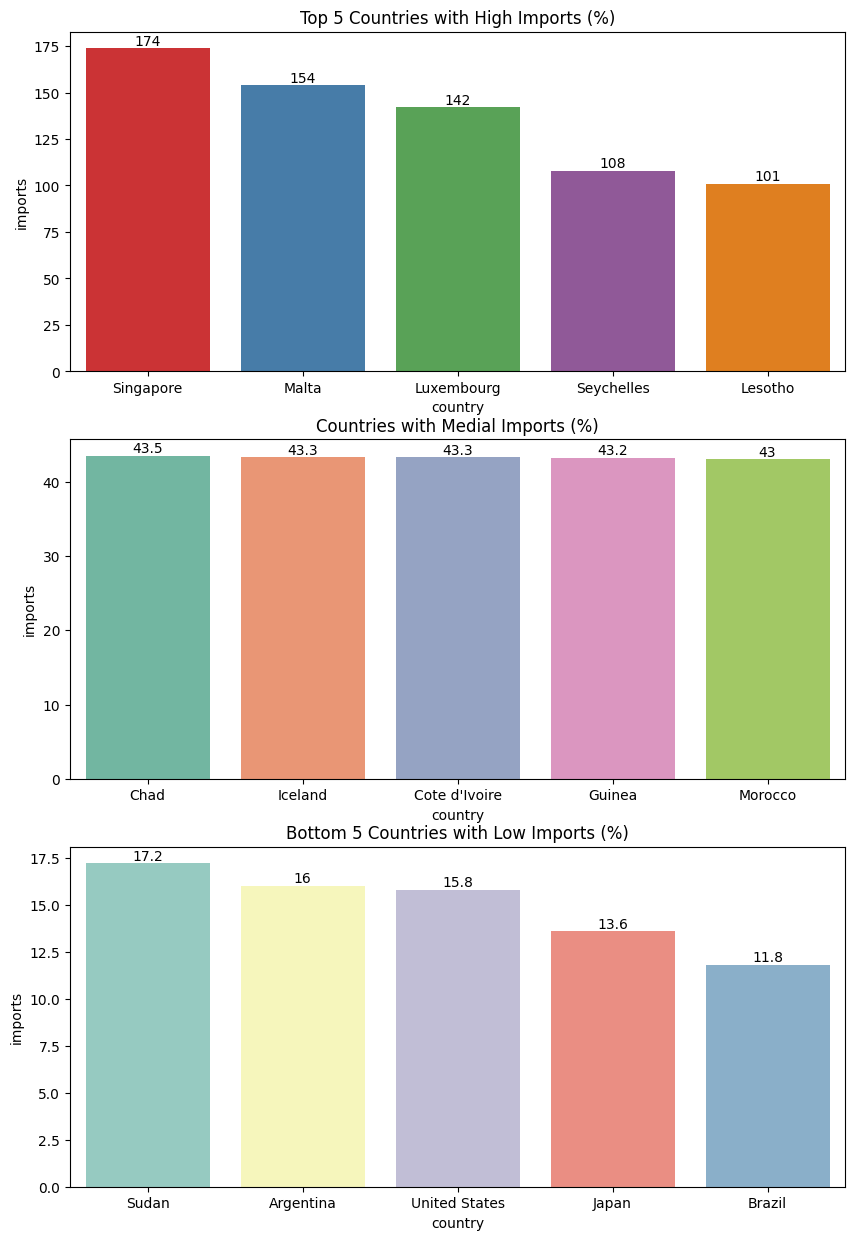

In [30]:
fig = plt.subplots(nrows = 3,ncols = 1,figsize = (10,15))
plt.subplot(3,1,1)
ax = sns.barplot(x = 'country',y = 'imports', data = df.sort_values(ascending = False,by = 'imports').iloc[:5],palette ='Set1');
plt.title('Top 5 Countries with High Imports (%)')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)

plt.subplot(3,1,2)
ax = sns.barplot(x = 'country',y = 'imports', data = df.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = 'Set2');
plt.title('Countries with Medial Imports (%)')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)

plt.subplot(3,1,3)
ax = sns.barplot(x = 'country',y = 'imports', data = df.sort_values(ascending = False,by = 'imports').iloc[161:166],palette = 'Set3');
plt.title('Bottom 5 Countries with Low Imports (%)')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    
plt.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

- Average Imports of countries is around 43% of GDP.
- Singapore having highest imports among all, followed by malta,Luxembourg .
- Brazil have the lowest imports then japan,US,argentia,sudan.

## Income 
- Income : Net income per person

Per capita income is national income divided by population size. Per capita income is often used to measure a sector's average income and compare the wealth of different populations. Per capita income is also often used to measure a country's standard of living.

In [31]:
df['income']

0       1610
1       9930
2      12900
3       5900
4      19100
       ...  
162     2950
163    16500
164     4490
165     4480
166     3280
Name: income, Length: 167, dtype: int64

In [32]:
df['income'].describe()

count      167.00
mean     17144.69
std      19278.07
min        609.00
25%       3355.00
50%       9960.00
75%      22800.00
max     125000.00
Name: income, dtype: float64

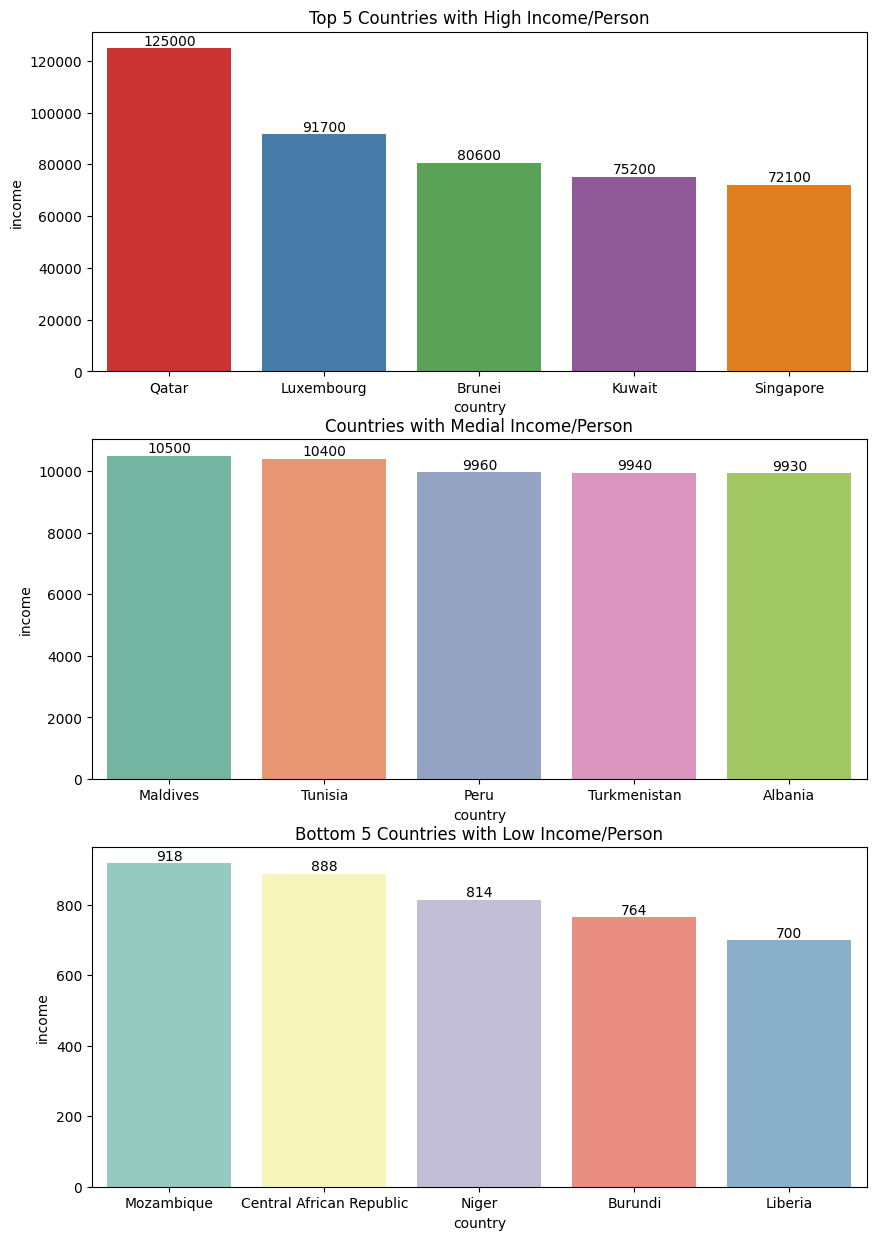

In [33]:
fig = plt.subplots(nrows = 3,ncols = 1,figsize = (10,15))
plt.subplot(3,1,1)
ax = sns.barplot(x = 'country',y = 'income', data = df.sort_values(ascending = False,by = 'income').iloc[:5],palette ="Set1");
plt.title('Top 5 Countries with High Income/Person')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    
plt.subplot(3,1,2)
ax = sns.barplot(x = 'country',y = 'income', data = df.sort_values(ascending = False,by = 'income').iloc[81:86],palette ="Set2");
plt.title('Countries with Medial Income/Person')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)

plt.subplot(3,1,3)
ax = sns.barplot(x = 'country',y = 'income', data = df.sort_values(ascending = False,by = 'income').iloc[161:166],palette = "Set3");
plt.title('Bottom 5 Countries with Low Income/Person')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    
plt.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

- Qatar has one of the world's largest reserves of petroleum and natural gas and employs large numbers of foreign workers in its production process,So Qatar having higest income per person.
- Liberia is a low-income country that relies heavily on foreign assistance and remittances from the diaspora.


## Inflation
- Inflation : The measurement of the annual growth rate of the Total GDP

Inflation measures how much more expensive a set of goods and services has become over a certain period, usually a year. It may be one of the most familiar words in economics.

In [34]:
df['inflation']

0      9.44
1      4.49
2     16.10
3     22.40
4      1.44
       ... 
162    2.62
163   45.90
164   12.10
165   23.60
166   14.00
Name: inflation, Length: 167, dtype: float64

In [35]:
df['inflation'].describe()

count   167.00
mean      7.78
std      10.57
min      -4.21
25%       1.81
50%       5.39
75%      10.75
max     104.00
Name: inflation, dtype: float64

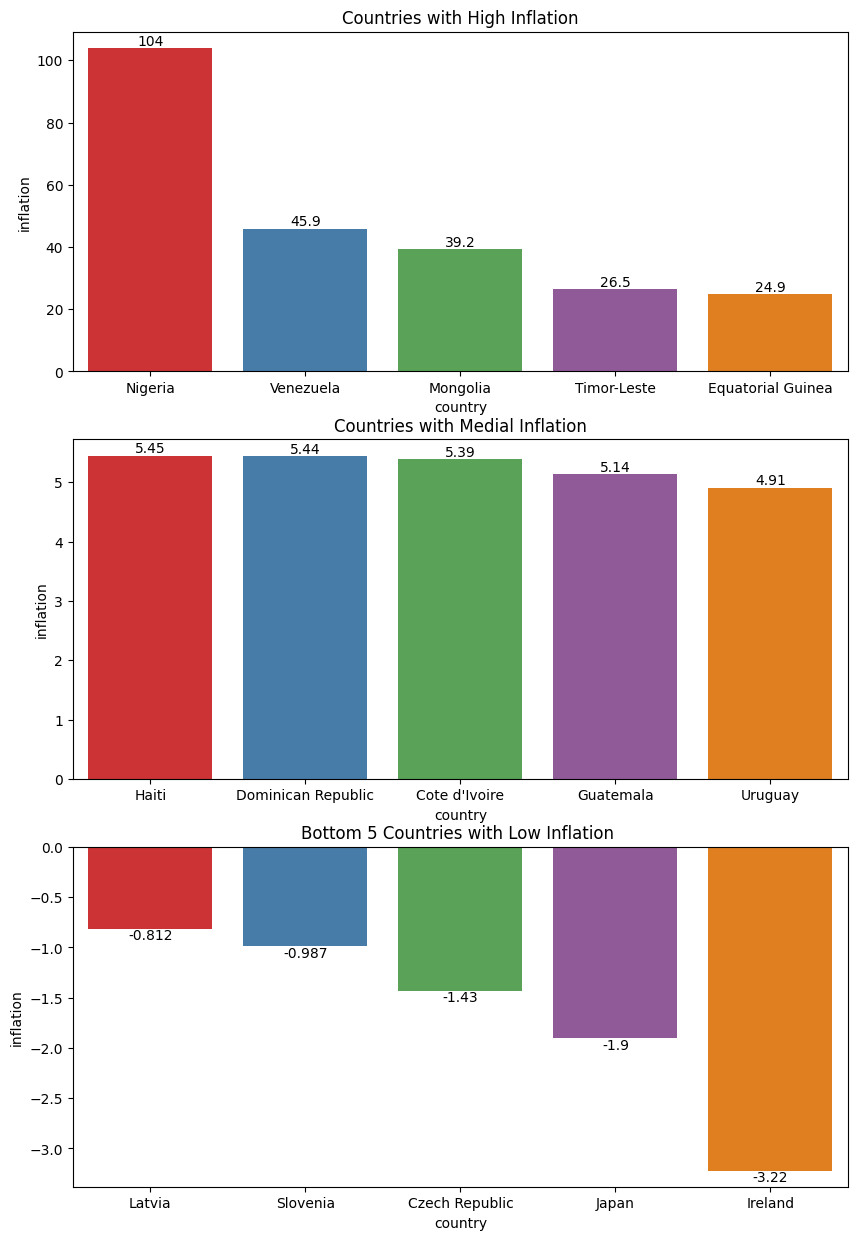

In [36]:
fig = plt.subplots(nrows = 3,ncols = 1,figsize = (10,15))
plt.subplot(3,1,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = df.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = 'Set1');
plt.title('Countries with High Inflation')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    

plt.subplot(3,1,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = df.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette ='Set1');
plt.title('Countries with Medial Inflation')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    

plt.subplot(3,1,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = df.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = 'Set1');
plt.title('Bottom 5 Countries with Low Inflation ')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    
plt.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

- Nigeria have the highest inflation
- Ireland have the lowest inflation in negative
- Average inflation of dataset is approx. 5%

## life_expec
- life_expec : The average number of years a new born child would live if the current mortality patterns are to rem...

The term “life expectancy” refers to the number of years a person can expect to live. By definition, life expectancy is based on an estimate of the average age that members of a particular population group will be when they die

 Higher life expectancy displays citizens with health attributes physically as well as mentally!

In [37]:
df['life_expec']

0     56.20
1     76.30
2     76.50
3     60.10
4     76.80
       ... 
162   63.00
163   75.40
164   73.10
165   67.50
166   52.00
Name: life_expec, Length: 167, dtype: float64

In [38]:
df['life_expec'].describe()

count   167.00
mean     70.56
std       8.89
min      32.10
25%      65.30
50%      73.10
75%      76.80
max      82.80
Name: life_expec, dtype: float64

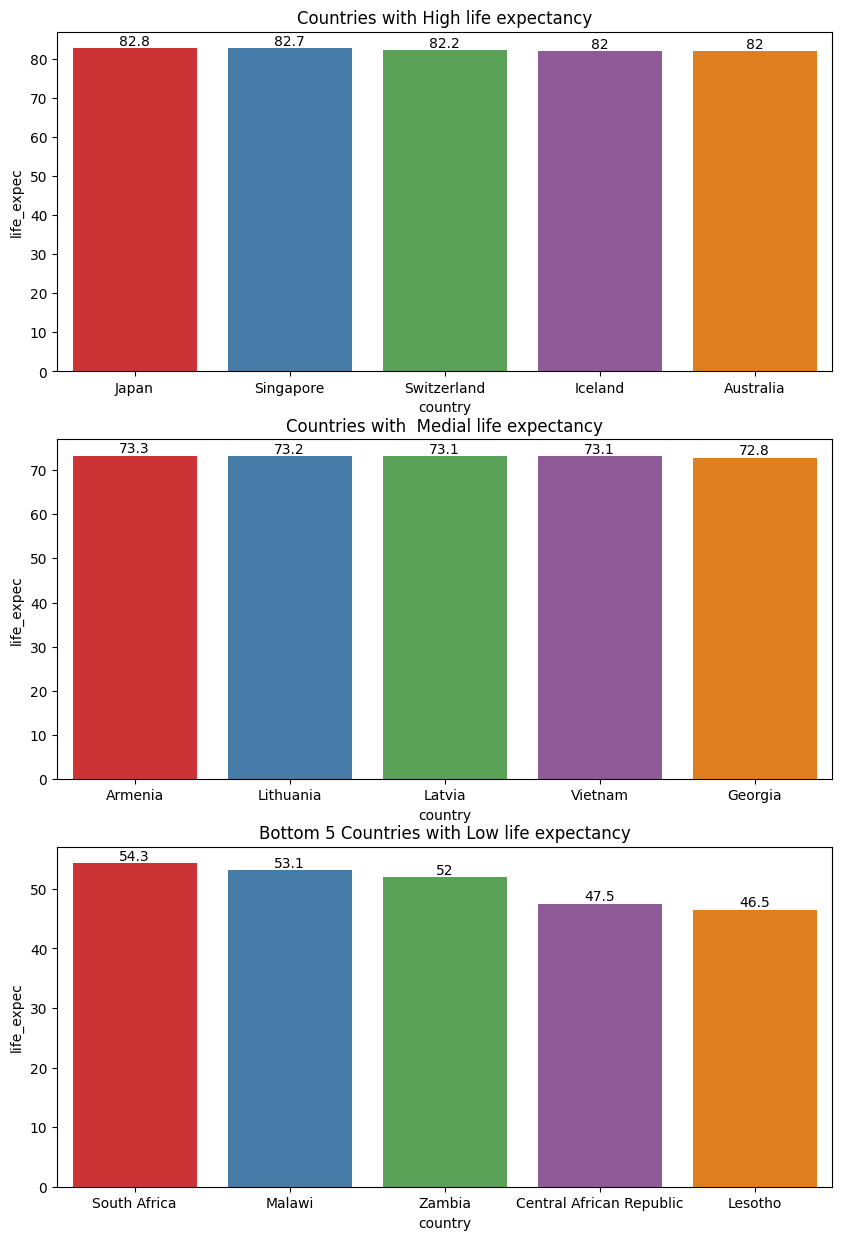

In [39]:
fig = plt.subplots(nrows = 3,ncols = 1,figsize = (10,15))
plt.subplot(3,1,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = df.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = 'Set1');
plt.title('Countries with High life expectancy')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    

plt.subplot(3,1,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = df.sort_values(ascending = False,by ='life_expec').iloc[81:86],palette ='Set1');
plt.title('Countries with  Medial life expectancy')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    

plt.subplot(3,1,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = df.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = 'Set1');
plt.title('Bottom 5 Countries with Low life expectancy')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    
plt.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

- life_expec depends alot on mental state as well as the lifestyle adopted by the citizens. Singapore is again present in the top of 5 of a feature.
- None of the countries with a high life_expec are present in the top 5 of health that is related to the spending done by the citizen on health.
- African countries are again present in the lower end for another feature.

## total_fer
- total_fer : The number of children that would be born to each woman if the current age-fertility rates remain th...

In [40]:
df['total_fer']

0     5.82
1     1.65
2     2.89
3     6.16
4     2.13
      ... 
162   3.50
163   2.47
164   1.95
165   4.67
166   5.40
Name: total_fer, Length: 167, dtype: float64

In [41]:
df['total_fer'].describe()

count   167.00
mean      2.95
std       1.51
min       1.15
25%       1.79
50%       2.41
75%       3.88
max       7.49
Name: total_fer, dtype: float64

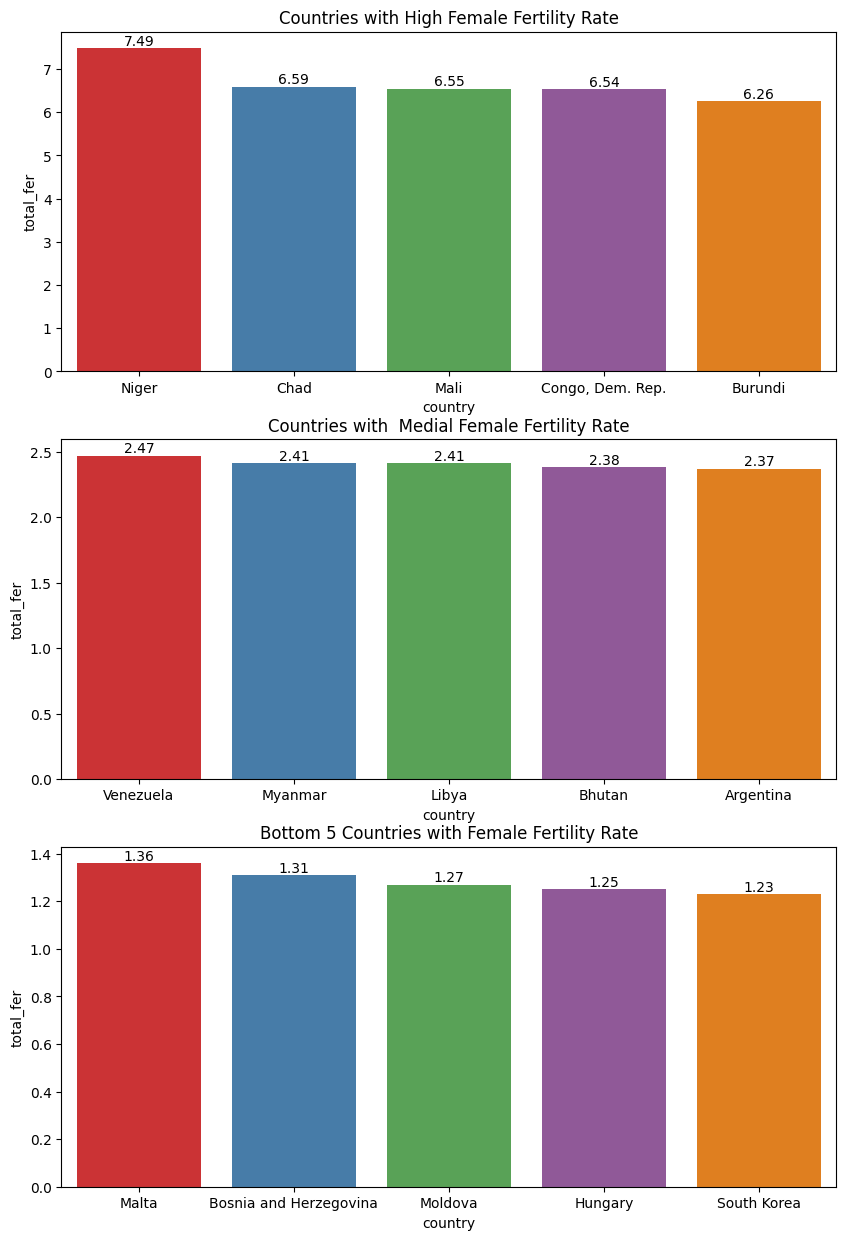

In [42]:
fig = plt.subplots(nrows = 3,ncols = 1,figsize = (10,15))
plt.subplot(3,1,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = 'Set1');
plt.title('Countries with High Female Fertility Rate')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    

plt.subplot(3,1,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by ='total_fer').iloc[81:86],palette ='Set1');
plt.title('Countries with  Medial Female Fertility Rate')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    

plt.subplot(3,1,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = 'Set1');
plt.title('Bottom 5 Countries with Female Fertility Rate')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    
plt.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

fertility rate is the ratio between the number of live births in a year and the whole female population of childbearing age 

## gdpp
- gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.

In [43]:
df['gdpp']

0        553
1       4090
2       4460
3       3530
4      12200
       ...  
162     2970
163    13500
164     1310
165     1310
166     1460
Name: gdpp, Length: 167, dtype: int64

In [44]:
df['gdpp'].describe()

count      167.00
mean     12964.16
std      18328.70
min        231.00
25%       1330.00
50%       4660.00
75%      14050.00
max     105000.00
Name: gdpp, dtype: float64

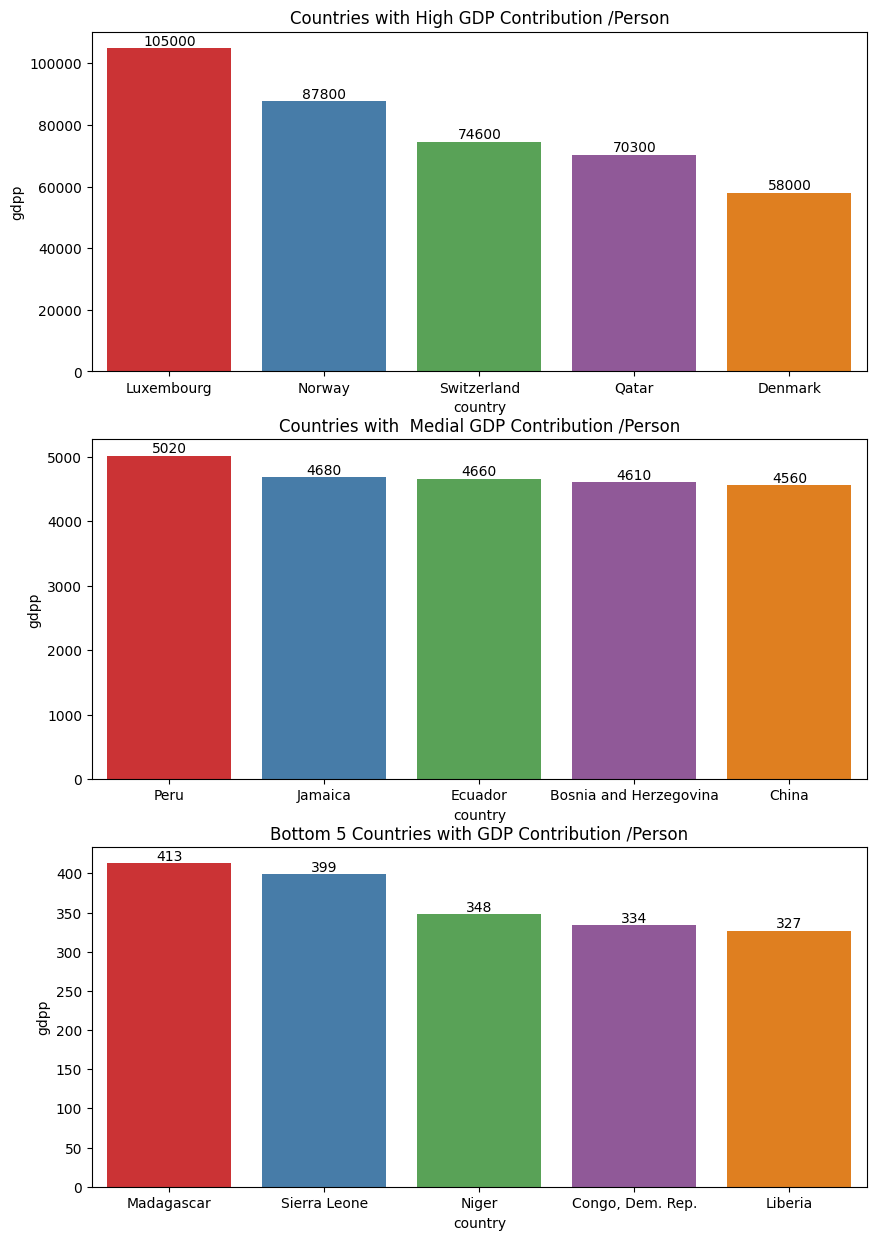

In [45]:
fig = plt.subplots(nrows = 3,ncols = 1,figsize = (10,15))
plt.subplot(3,1,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = 'Set1');
plt.title('Countries with High GDP Contribution /Person')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    

plt.subplot(3,1,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by ='gdpp').iloc[81:86],palette ='Set1');
plt.title('Countries with  Medial GDP Contribution /Person')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    

plt.subplot(3,1,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = 'Set1');
plt.title('Bottom 5 Countries with GDP Contribution /Person')
for container in ax.containers:
    ax.bar_label(container,fontsize=10)
    
plt.subplots_adjust(wspace=0.3,hspace=0.2)
plt.show()

## Correlation

<AxesSubplot: >

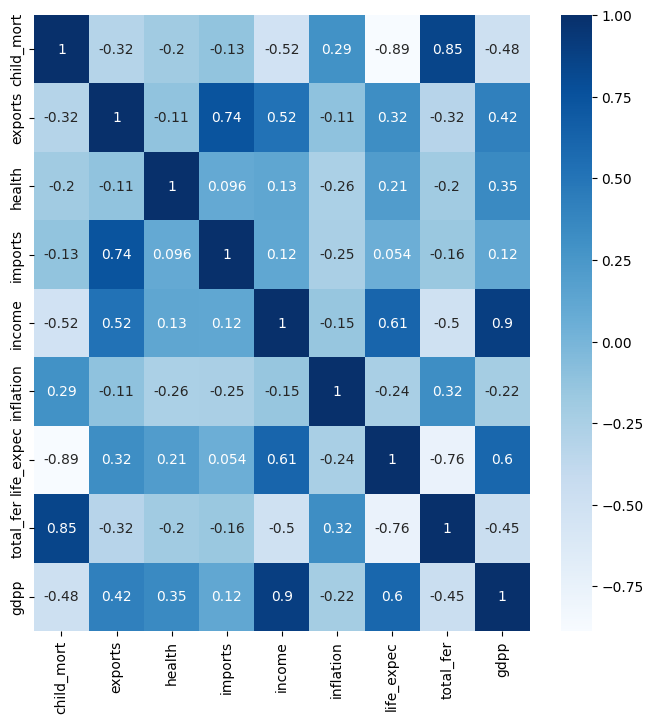

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues",)

- Many features have correlation with each other
- gdpp and income are highly correlated with each other.
- Exports are increases with increase in gdpp,income and imports.
- child_mort is highly negatively correlated with life_expec and positively correlated with total_fer/
- income more positively correalated with exports and life_expec.
- total_fer increases with decrease in income,life_expec

## Unsupervised Learning

 **Unsupervised Learning** : It is a problem where the target variable / feature is unknown. **Unsupervised Learning** problems widely occur in medical domain where mutliple readings are taken and the underlying diseases are unknown. 
- Thus, searching for patterns by using visualization techniques provides us with some underlying insight that cannot be understood by staring into the tabular data.
- However, when the size of the datasets becomes huge with too many features, data visualization can be a tedious task to execute. Hence, we move towards the algorithmic approach.

### Features of Economically Backward Countries :

- The country's **per capita income is very low**.
- **High Population** that leads to non - availability of resources.
- **Unemployment** due to less resources.
- **Low country wealth** that leads to **low capital**.
- **Inequitable** distribution of **wealth** and **income**.  
- **Lack of proper educational amenities** and thus **illiteracy prevails**.
- **Low level of living**.
- **No technical advancement**.
- **Poor health services** coupled with **high birth & death rates**.

**HELP Foundation needs to target the countries that display the above characteristics. We will now visualize the data and find the countries that lie at the extremes and the center of the each feature to point out the countries that require assistance!**

In [47]:
df1=df.copy()

In [48]:
df1.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan       90.20    10.00    7.58    44.90    1610   
1              Albania       16.60    28.00    6.55    48.60    9930   
2              Algeria       27.30    38.40    4.17    31.40   12900   
3               Angola      119.00    62.30    2.85    42.90    5900   
4  Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44       56.20       5.82    553  
1       4.49       76.30       1.65   4090  
2      16.10       76.50       2.89   4460  
3      22.40       60.10       6.16   3530  
4       1.44       76.80       2.13  12200

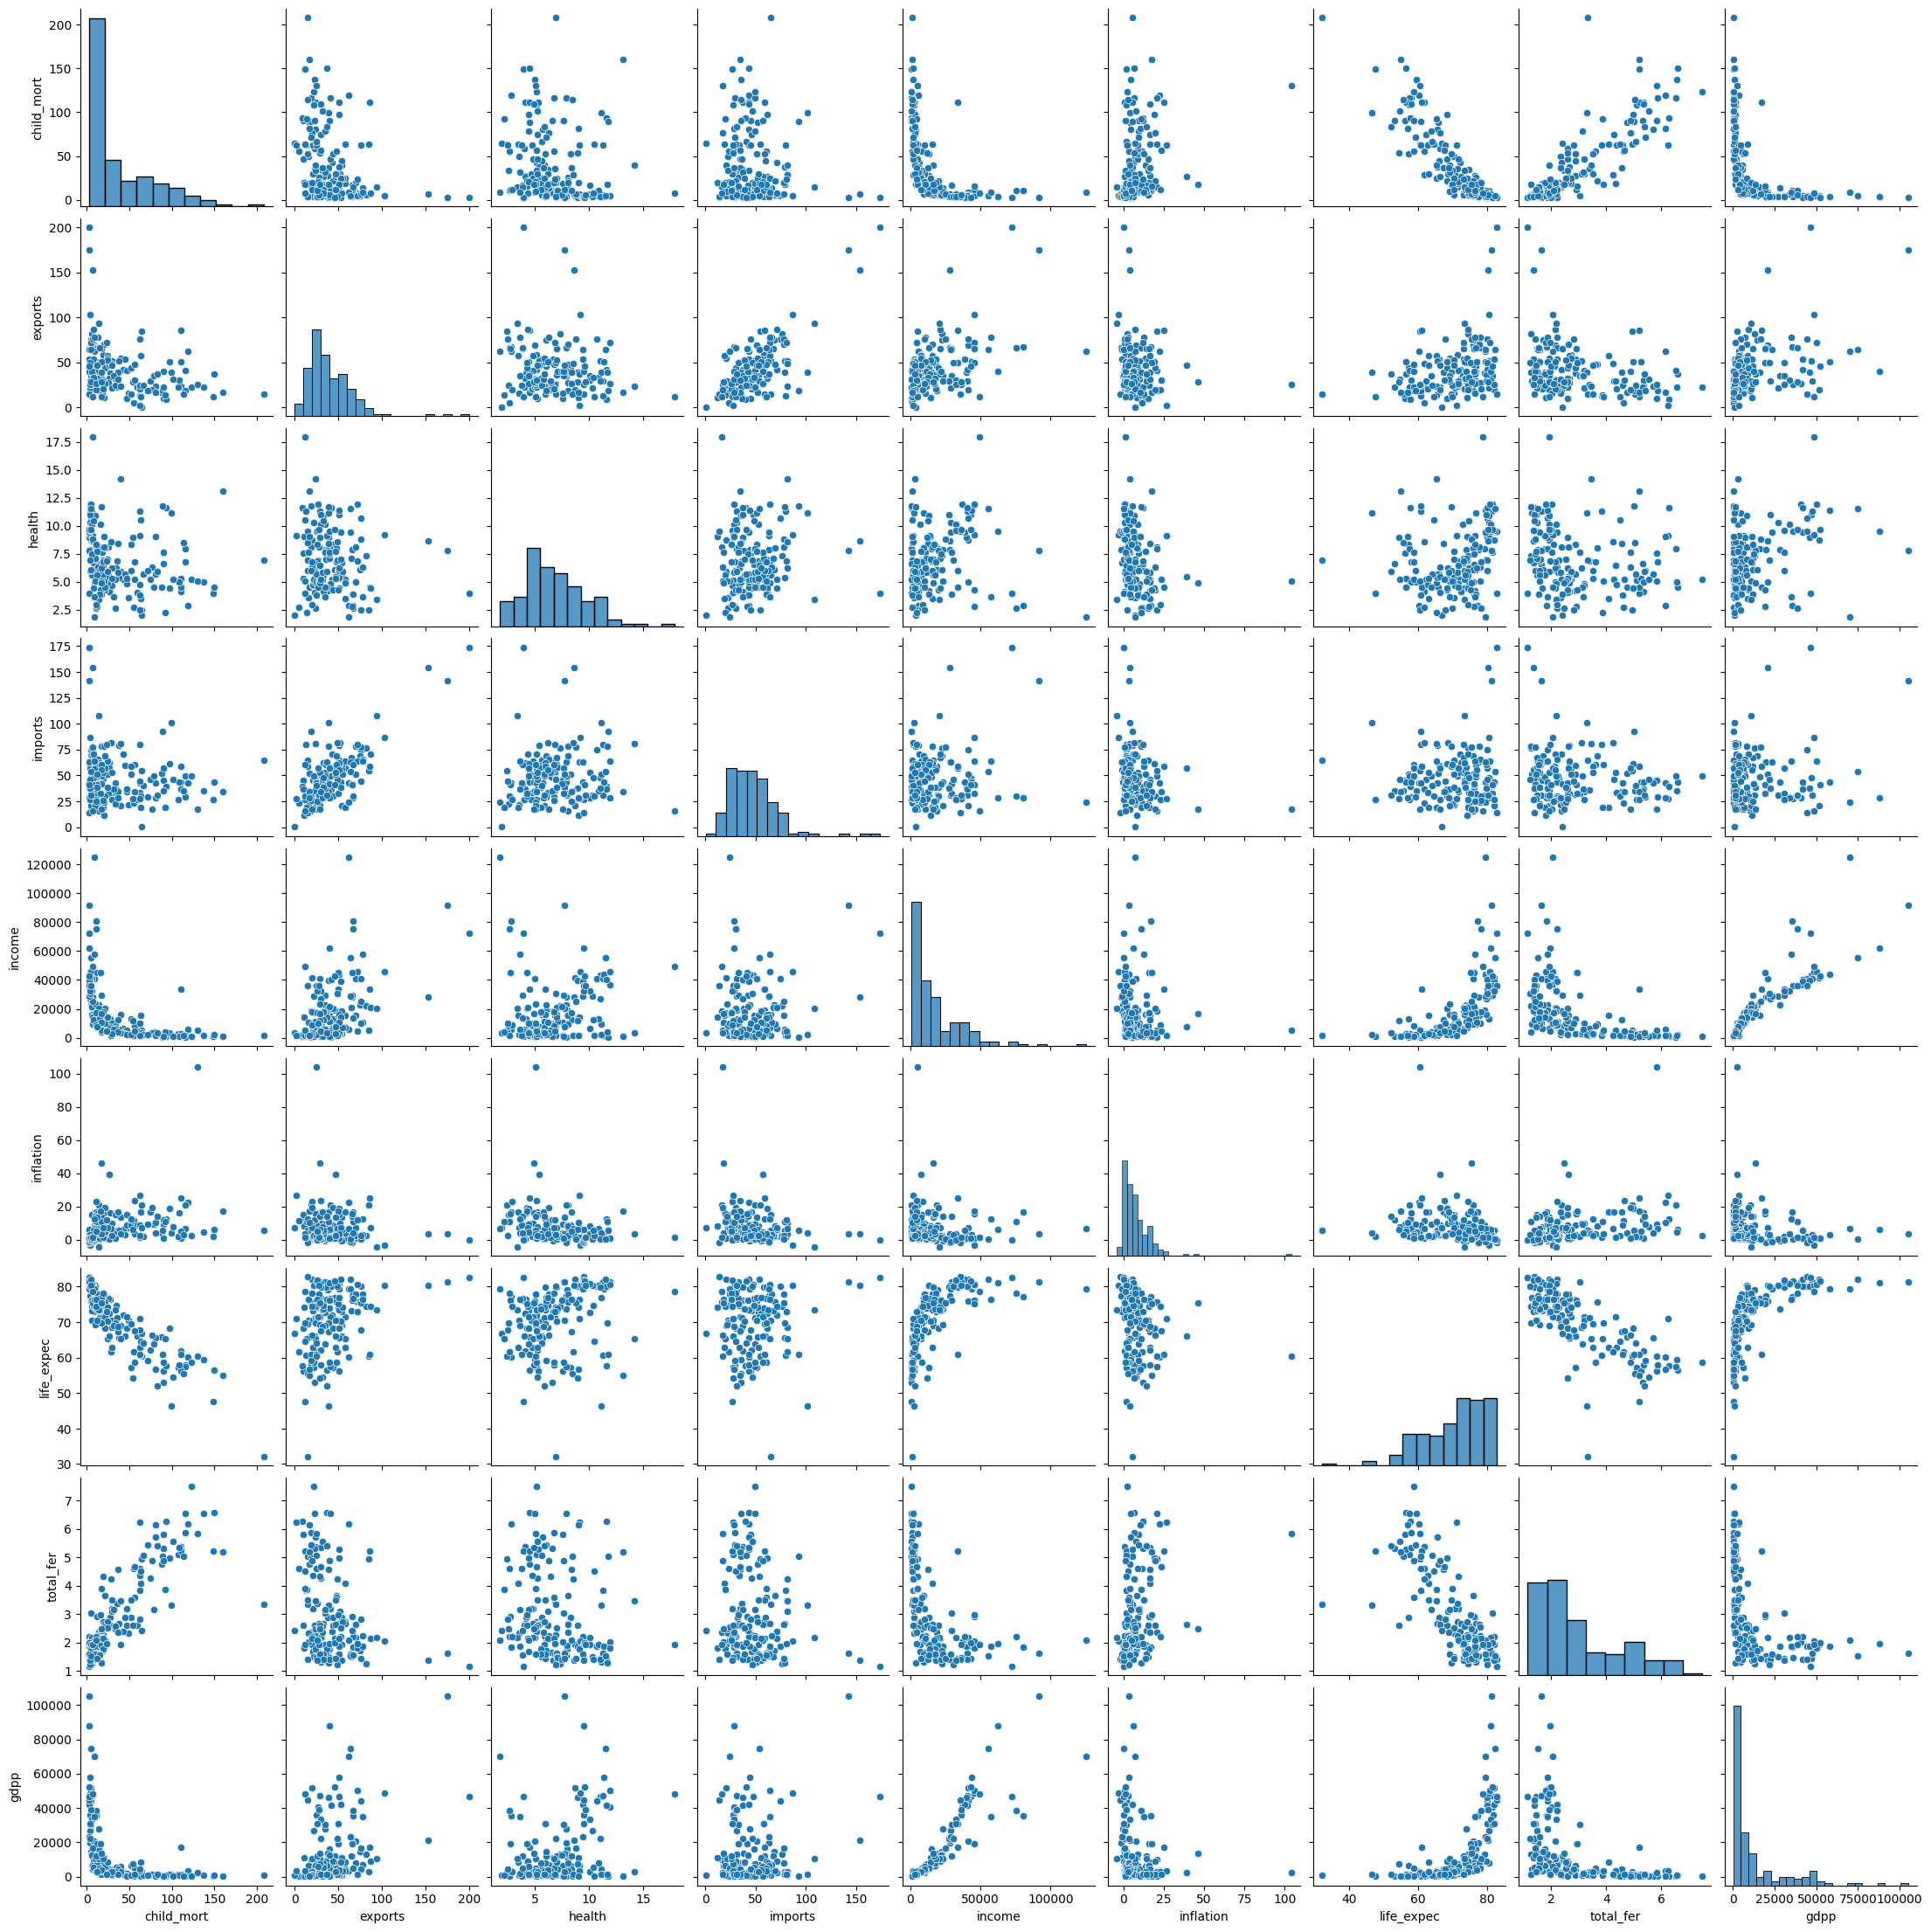

In [49]:
sns.pairplot(df1)

## K mean Clustering

K-means clustering is a popular unsupervised machine learning algorithm that is used to cluster or group similar data points together in a dataset. The algorithm takes as input the number of clusters to be formed (k) and the dataset. It then randomly initializes k cluster centroids and iteratively assigns each data point to the nearest centroid, then recomputes the centroid of each cluster based on the newly assigned points. The algorithm repeats these steps until convergence, or until a maximum number of iterations is reached.

In [50]:
from sklearn.preprocessing import OrdinalEncoder

In [51]:
oe=OrdinalEncoder()
df1['country']=oe.fit_transform(df1[['country']])

In [52]:
df1.corr()

country  child_mort  exports  health  imports  income  inflation  \
country        1.00       -0.07     0.06    0.04     0.07    0.04       0.09   
child_mort    -0.07        1.00    -0.32   -0.20    -0.13   -0.52       0.29   
exports        0.06       -0.32     1.00   -0.11     0.74    0.52      -0.11   
health         0.04       -0.20    -0.11    1.00     0.10    0.13      -0.26   
imports        0.07       -0.13     0.74    0.10     1.00    0.12      -0.25   
income         0.04       -0.52     0.52    0.13     0.12    1.00      -0.15   
inflation      0.09        0.29    -0.11   -0.26    -0.25   -0.15       1.00   
life_expec     0.02       -0.89     0.32    0.21     0.05    0.61      -0.24   
total_fer      0.00        0.85    -0.32   -0.20    -0.16   -0.50       0.32   
gdpp           0.03       -0.48     0.42    0.35     0.12    0.90      -0.22   

            life_expec  total_fer  gdpp  
country           0.02       0.00  0.03  
child_mort       -0.89       0.85 -0.48  
exports           0.32      -0.32  0.42  
health            0.21      -0.20  0.35  
imports           0.05      -0.16  0.12  
income            0.61      -0.50  0.90  
inflation        -0.24       0.32 -0.22  
life_expec        1.00      -0.76  0.60  
total_fer        -0.76       1.00 -0.45  
gdpp              0.60      -0.45  1.00

In [53]:
df1.drop('country',axis=1,inplace=True)

In [54]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [55]:
scaler=StandardScaler()
mm=MinMaxScaler()

In [56]:
df1_scaled=scaler.fit_transform(df1)

In [57]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=3)
cluster_labels =kmean.fit_predict(df1_scaled)


In [58]:
cluster_labels

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

## Elbow method to find best value of K

The elbow method is a popular technique used to determine the optimal number of clusters (k) for a dataset when using the K-means clustering algorithm. It works by plotting the value of the objective function (inertia) as a function of the number of clusters (k) and identifying the point at which the rate of decrease in inertia slows down and forms an elbow shape. The intuition behind this method is that as we increase the number of clusters, the inertia will generally decrease, but beyond a certain point, the rate of decrease will become marginal, and the added complexity of additional clusters will not be justified by the reduction in inertia.

In [59]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(df1_scaled)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

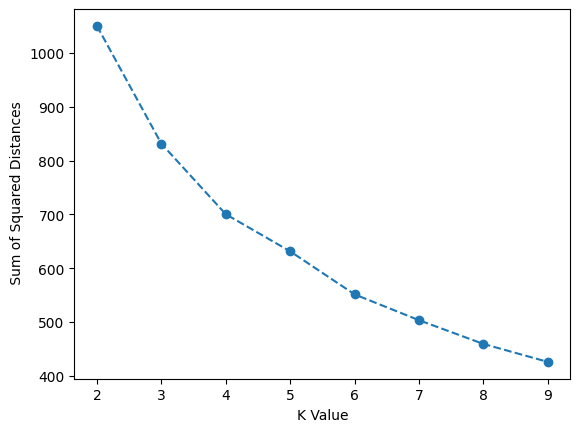

In [60]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [61]:
ssd  #Sum of Square Error

[1050.2145582853304,
 831.4244352086873,
 700.3917199643636,
 631.3877859960571,
 551.486866933688,
 503.49142539415544,
 459.3799692426203,
 426.01712176510813]

In [62]:
pd.Series(ssd).diff()

0       NaN
1   -218.79
2   -131.03
3    -69.00
4    -79.90
5    -48.00
6    -44.11
7    -33.36
dtype: float64

<AxesSubplot: >

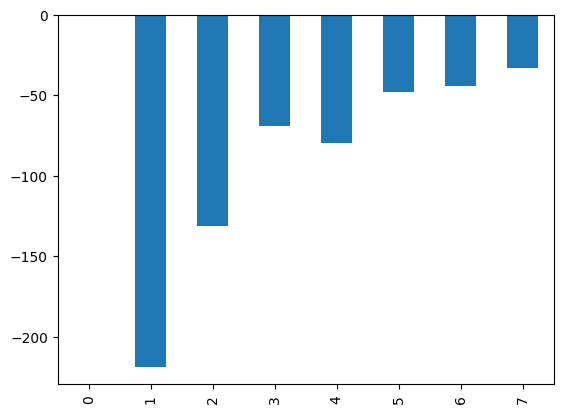

In [63]:
pd.Series(ssd).diff().plot(kind='bar')#plot sum of square difference with previous one


### n_cluster=3

In [64]:
df1['cluster1']=cluster_labels #adding cluster1 column to dataset

In [65]:
df1.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0       90.20    10.00    7.58    44.90    1610       9.44       56.20   
1       16.60    28.00    6.55    48.60    9930       4.49       76.30   
2       27.30    38.40    4.17    31.40   12900      16.10       76.50   
3      119.00    62.30    2.85    42.90    5900      22.40       60.10   
4       10.30    45.50    6.03    58.90   19100       1.44       76.80   

   total_fer   gdpp  cluster1  
0       5.82    553         1  
1       1.65   4090         2  
2       2.89   4460         2  
3       6.16   3530         1  
4       2.13  12200         2

## Centers of the clusters

In [66]:
kmean.cluster_centers_

array([[-0.82744866,  0.64507985,  0.72741122,  0.19063895,  1.48424268,
        -0.48492064,  1.07957853, -0.79187687,  1.61599536],
       [ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.40645337, -0.03165259, -0.2244709 ,  0.02416161, -0.25177041,
        -0.01716742,  0.25473362, -0.42434279, -0.35448141]])

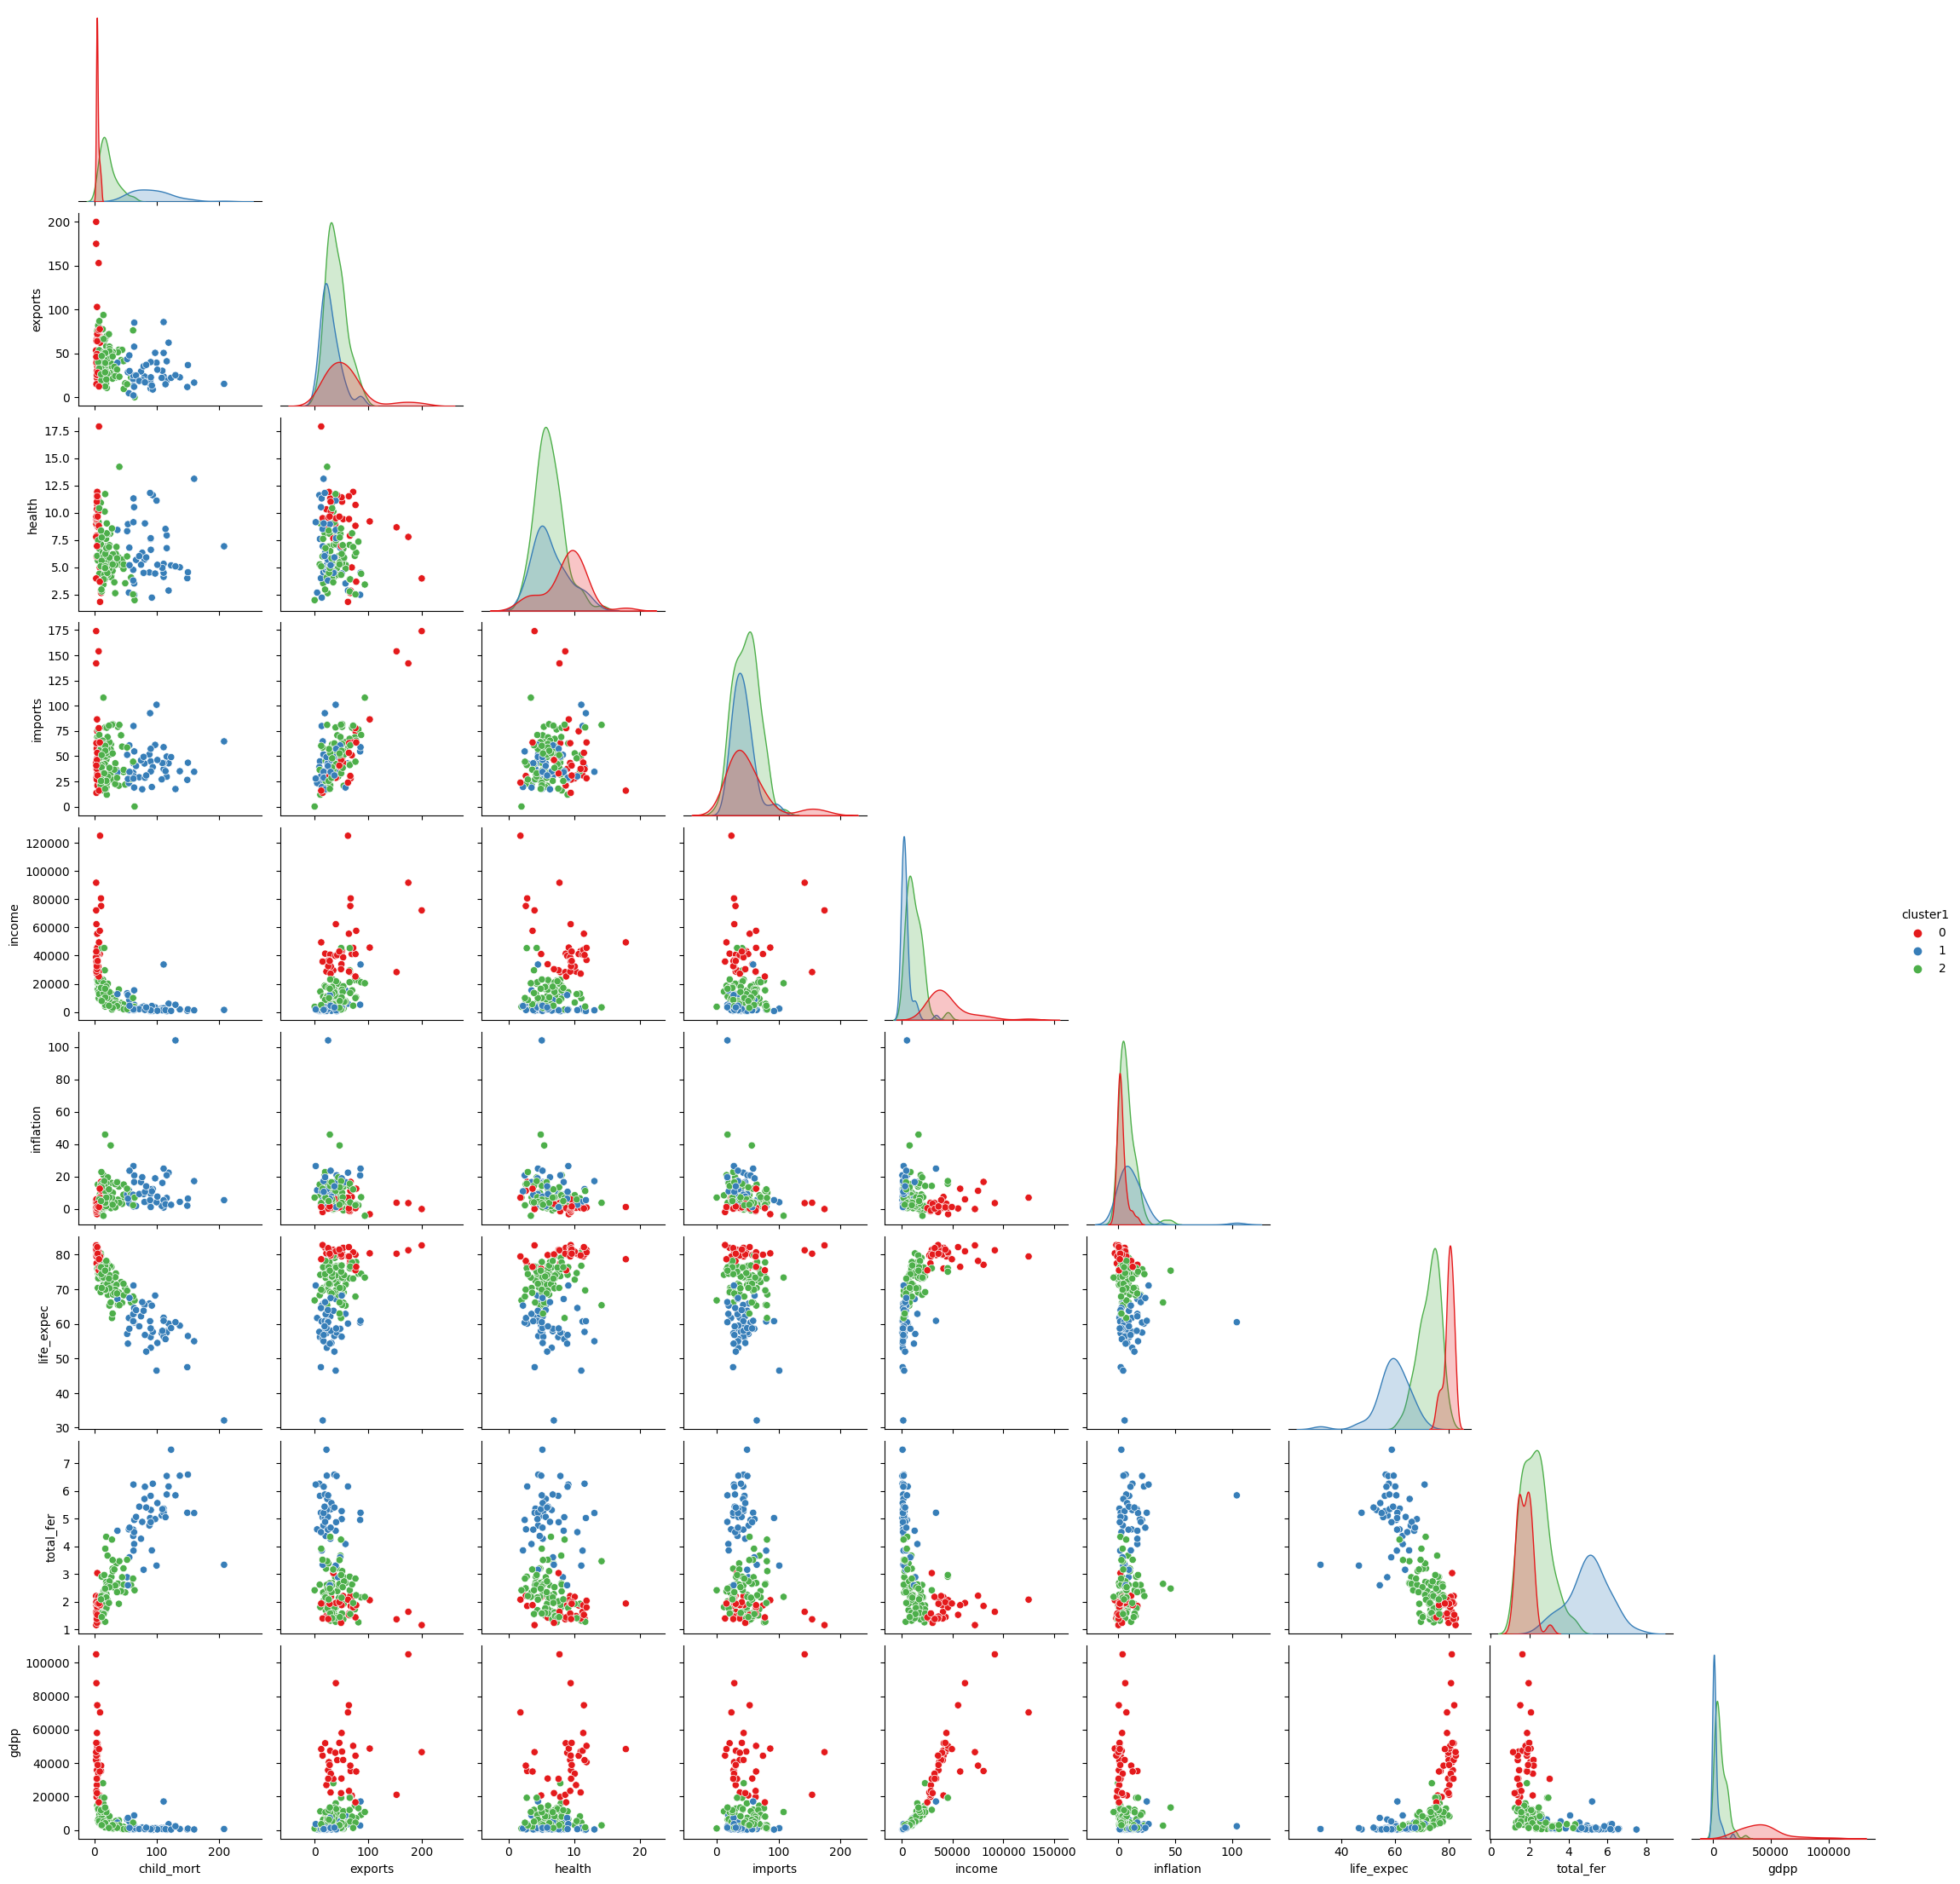

In [67]:
sns.pairplot(df1,hue='cluster1',palette='Set1',corner=True)

## 3d Plot showing clusters

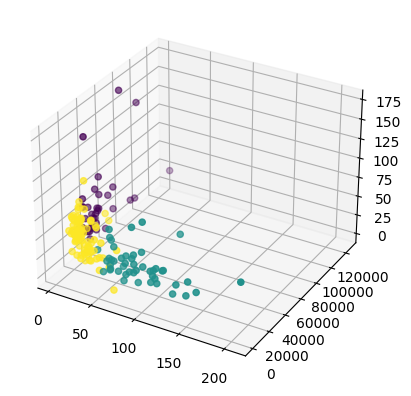

In [68]:
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
#colors = df['cluster2'].map({0:'red', 1:'blue', 2:'yellow'})
ax.scatter(df1['child_mort'],df1['income'],df1['imports'],c = df1['cluster1']);

#### Average exports of each clusters

In [69]:
df1.groupby('cluster1')['exports'].mean()

cluster1
0   58.74
1   29.15
2   40.24
Name: exports, dtype: float64

In [70]:
df1.groupby('cluster1')['income'].mean()

cluster1
0   45672.22
1    3942.40
2   12305.60
Name: income, dtype: float64

In [71]:
df1.drop('cluster1',axis=1).corrwith(df1['cluster1'])

child_mort   -0.03
exports      -0.19
health       -0.34
imports      -0.04
income       -0.56
inflation     0.12
life_expec   -0.13
total_fer    -0.05
gdpp         -0.66
dtype: float64

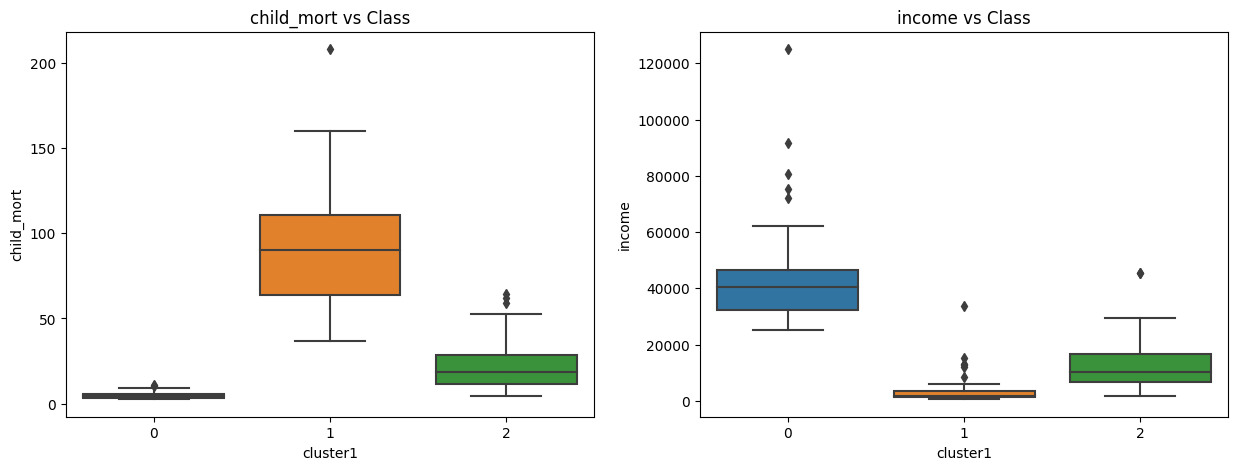

In [72]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster1', y = 'child_mort', data  = df1);
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster1', y = 'income', data  = df1);
plt.title('income vs Class')

plt.show()

**> 0 = "No need help"**

**> 1 = "Help Needed"**

**> 2 = "Might need help"**

In [73]:
df1['cluster1']=df1['cluster1'].map({0:"No need help",1:"Help needed",2:"Might need help"})

In [74]:
df1.insert(loc=0,value=df['country'],column='country')

In [75]:
df1.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan       90.20    10.00    7.58    44.90    1610   
1              Albania       16.60    28.00    6.55    48.60    9930   
2              Algeria       27.30    38.40    4.17    31.40   12900   
3               Angola      119.00    62.30    2.85    42.90    5900   
4  Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   

   inflation  life_expec  total_fer   gdpp         cluster1  
0       9.44       56.20       5.82    553      Help needed  
1       4.49       76.30       1.65   4090  Might need help  
2      16.10       76.50       2.89   4460  Might need help  
3      22.40       60.10       6.16   3530      Help needed  
4       1.44       76.80       2.13  12200  Might need help

In [76]:
df1.groupby('cluster1')['country'].count()

cluster1
Help needed        47
Might need help    84
No need help       36
Name: country, dtype: int64

In [77]:
fig = px.choropleth(df1[['country','cluster1']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['cluster1'],  
                    color_discrete_map = {'Help needed' : 'Red',
                                          'Might need Help' : 'Yellow',
                                          'No need help' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

=========================================================================================================================

## <center>Hierarchical Clustering<center>

**Hierarchical Clustering** is a distanced based algorithm that is used for unsupervised learning problems. 
    
- It develops the hierarchy of clusters in the form of a tree i.e known as the **dendrogram**. For this problem we are going to use **Agglomerative Clustering** which is a bottom-up approach that considers all the points as clusters and then merges them together based on their distances in the following ways :
    - Initally all the points are considered as clusters.
    - Then, clusters that are closer together they start merging as new cluster.
    - This combined cluster then further gets compared with other clusters and the closest cluster gets merged.
    - This process continues till a single large cluster is formed.
- This process of forming clusters can then be viewed with a **dendrogram**. From it, we select the number of clusters by identifying the number of merges present at the penultimate stage. More is the length of the vertical lines, higher the distance between the clusters.
- To select the number of clusters, we set a threshold value and count the number of vertical lines present above it. This number of vertical lines forms the number of clusters. Other methods like **Silhouette Score Method** and **Elbow method** can also be used.
- For **Agglomerative Clustering**, it has 2 important hyperparameters :
    - **linkage** : There are various connecting or linking methods for cluster i.e Single, Centroid, Average , etc.
    - **affinity** : It is the distance formula that compares the distance before merging the clusters. 

In [78]:
df2=df.copy()

In [79]:
df2.drop('country',axis=1,inplace=True)

In [80]:
df2.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0       90.20    10.00    7.58    44.90    1610       9.44       56.20   
1       16.60    28.00    6.55    48.60    9930       4.49       76.30   
2       27.30    38.40    4.17    31.40   12900      16.10       76.50   
3      119.00    62.30    2.85    42.90    5900      22.40       60.10   
4       10.30    45.50    6.03    58.90   19100       1.44       76.80   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
minm=MinMaxScaler()

In [83]:
df2_scaled=minm.fit_transform(df2)

In [84]:
df2_scaled

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [85]:
scaled_df = pd.DataFrame(df2_scaled,columns=df2.columns)

In [86]:
scaled_df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          0.43     0.05    0.36     0.26    0.01       0.13        0.48   
1          0.07     0.14    0.29     0.28    0.07       0.08        0.87   
2          0.12     0.19    0.15     0.18    0.10       0.19        0.88   
3          0.57     0.31    0.06     0.25    0.04       0.25        0.55   
4          0.04     0.23    0.26     0.34    0.15       0.05        0.88   
..          ...      ...     ...      ...     ...        ...         ...   
162        0.13     0.23    0.21     0.30    0.02       0.06        0.61   
163        0.07     0.14    0.19     0.10    0.13       0.46        0.85   
164        0.10     0.36    0.31     0.46    0.03       0.15        0.81   
165        0.26     0.15    0.21     0.20    0.03       0.26        0.70   
166        0.39     0.18    0.25     0.18    0.02       0.17        0.39   

     total_fer  gdpp  
0         0.74  0.00  
1         0.08  0.04  
2         0.27  0.04  
3         0.79  0.03  
4         0.15  0.11  
..         ...   ...  
162       0.37  0.03  
163       0.21  0.13  
164       0.13  0.01  
165       0.56  0.01  
166       0.67  0.01  

[167 rows x 9 columns]

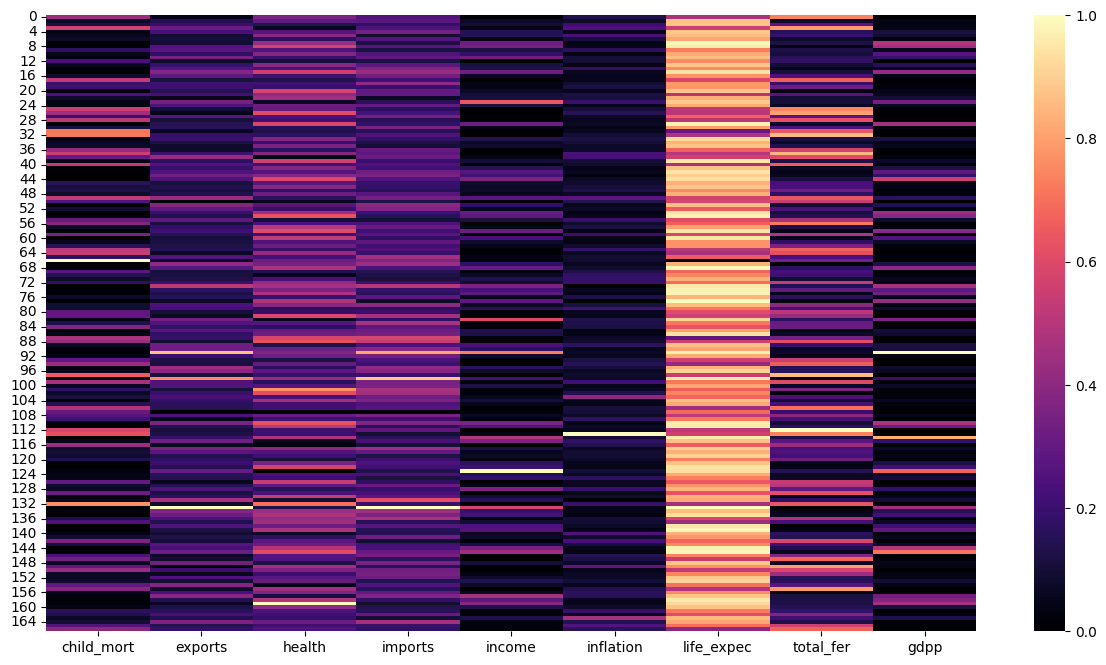

In [87]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df,cmap='magma');

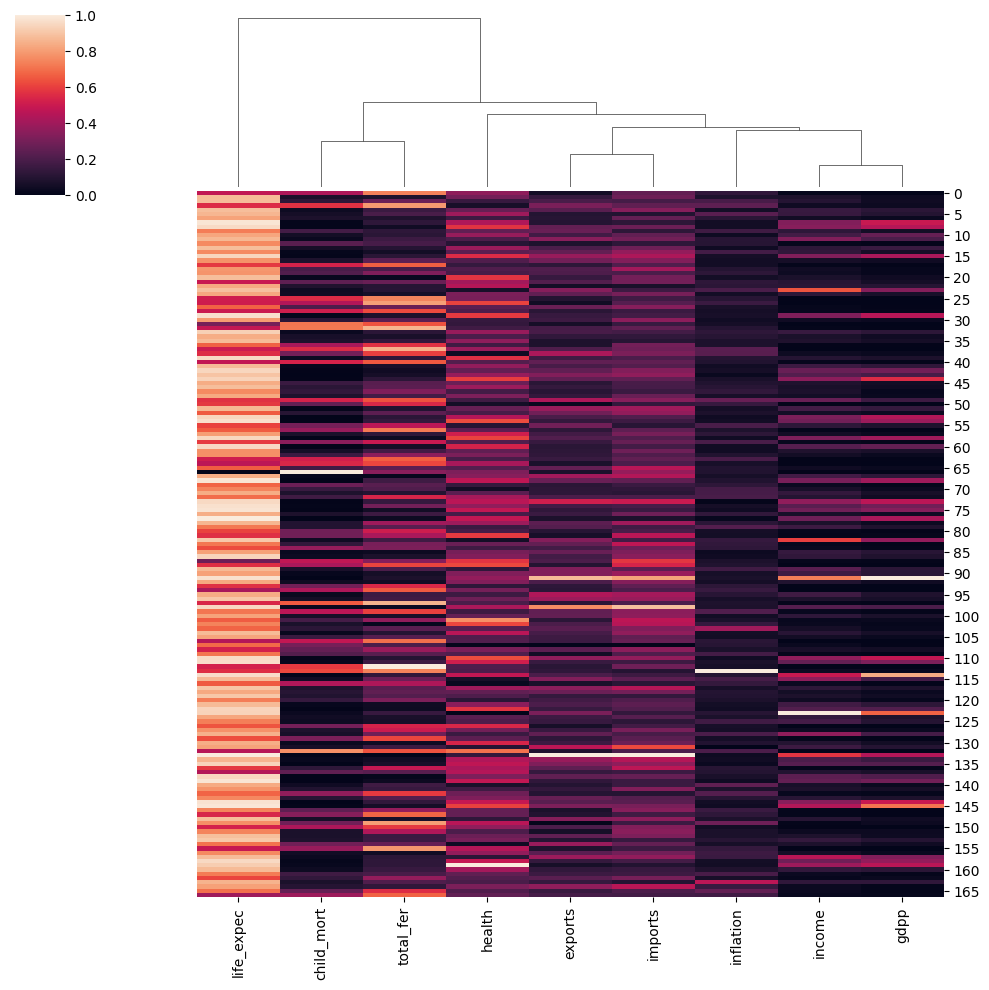

In [88]:
sns.clustermap(scaled_df,row_cluster=False)

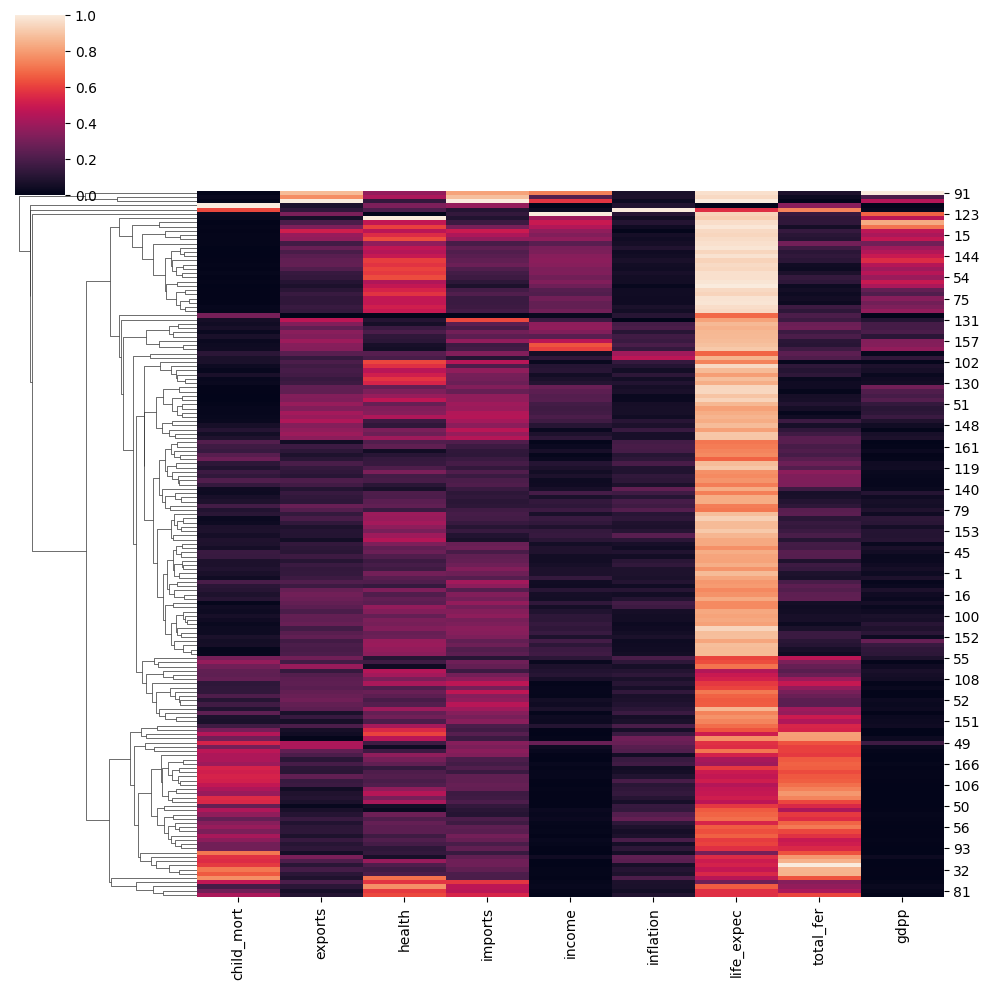

In [89]:
sns.clustermap(scaled_df,col_cluster=False)

Make sure to read the documentation online! https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Assuming every point starts as its own cluster

### Dendrogram

In [90]:
from scipy.cluster import hierarchy as hi 

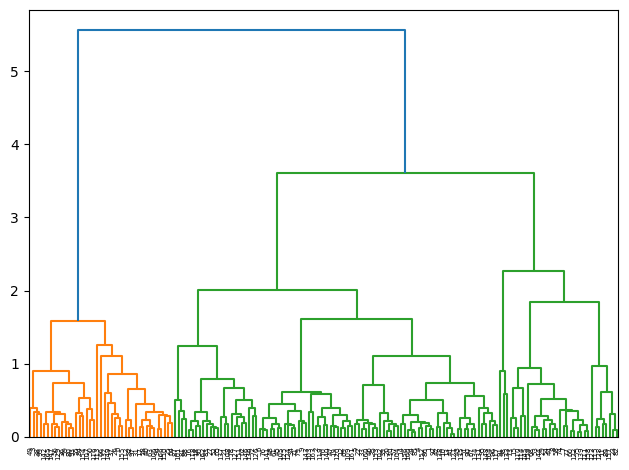

In [91]:
lk = hi.linkage(df2_scaled, method="ward", metric = 'euclidean')
ddg = hi.dendrogram(lk)
plt.tight_layout()
plt.show()

- From the dendogram, we find that this divides the data into three branches: one blue and two green. 
- This three-branch set of data shows this will form three clusters.

In [92]:
from sklearn.cluster import AgglomerativeClustering

In [93]:
model = AgglomerativeClustering(n_clusters=3)

In [94]:
cluster_labels = model.fit_predict(scaled_df)

In [95]:
cluster_labels

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int64)

<AxesSubplot: xlabel='child_mort', ylabel='income'>

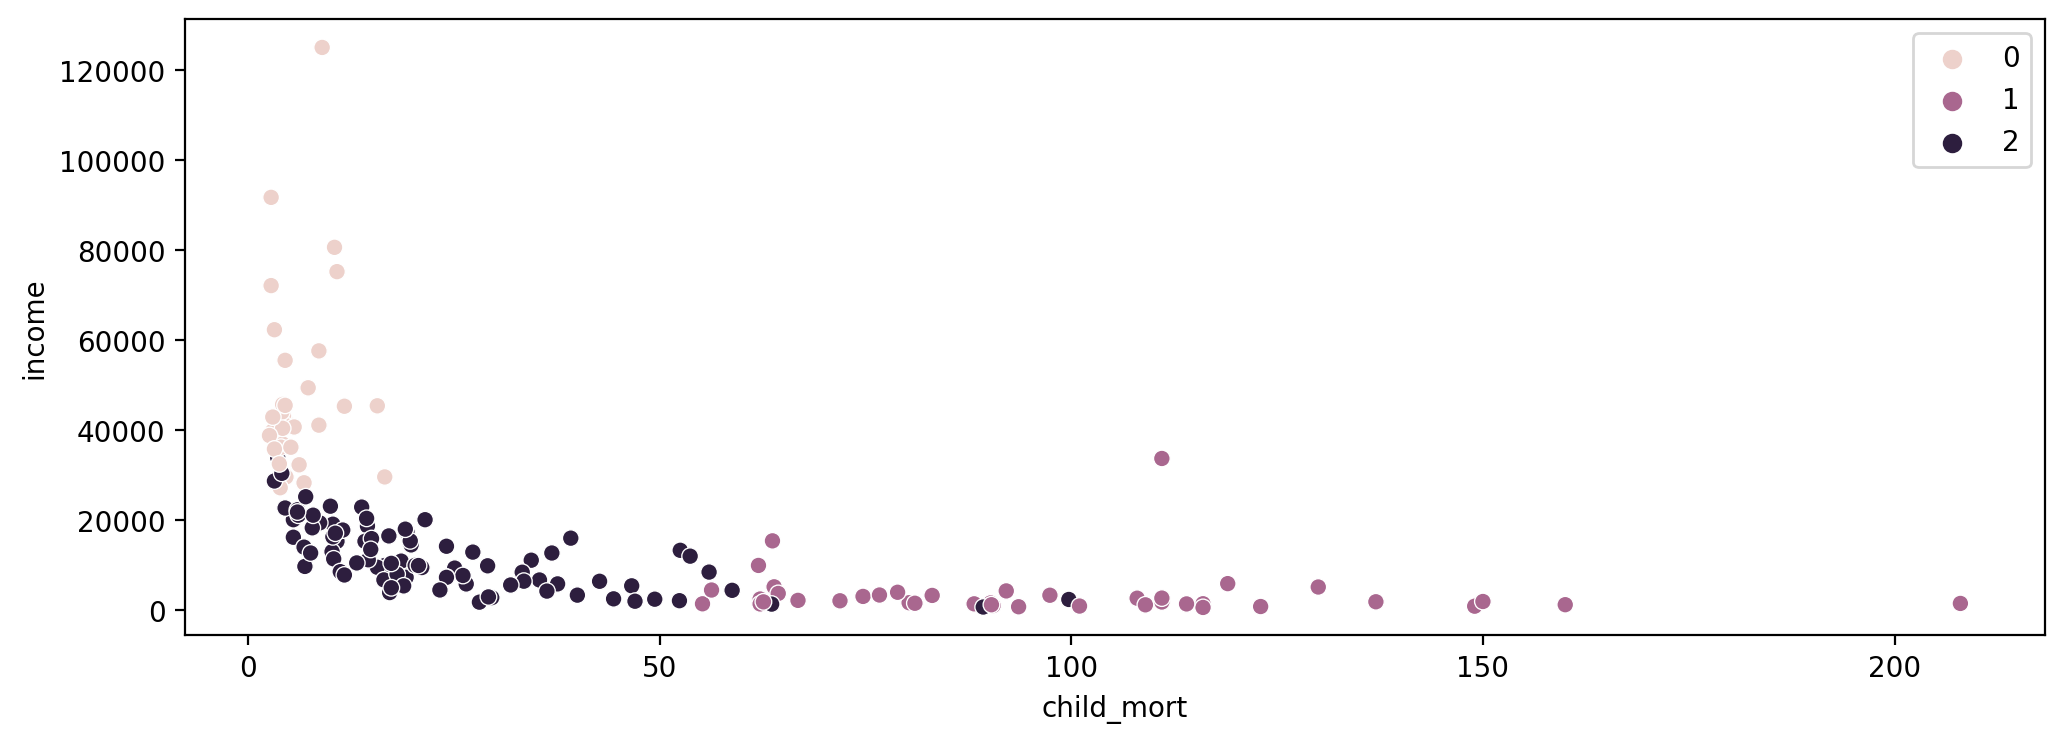

In [96]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df2,x='child_mort',y='income',hue=cluster_labels)

## Exploring Number of Clusters with Dendrograms

In [97]:
df2['cluster2']=cluster_labels

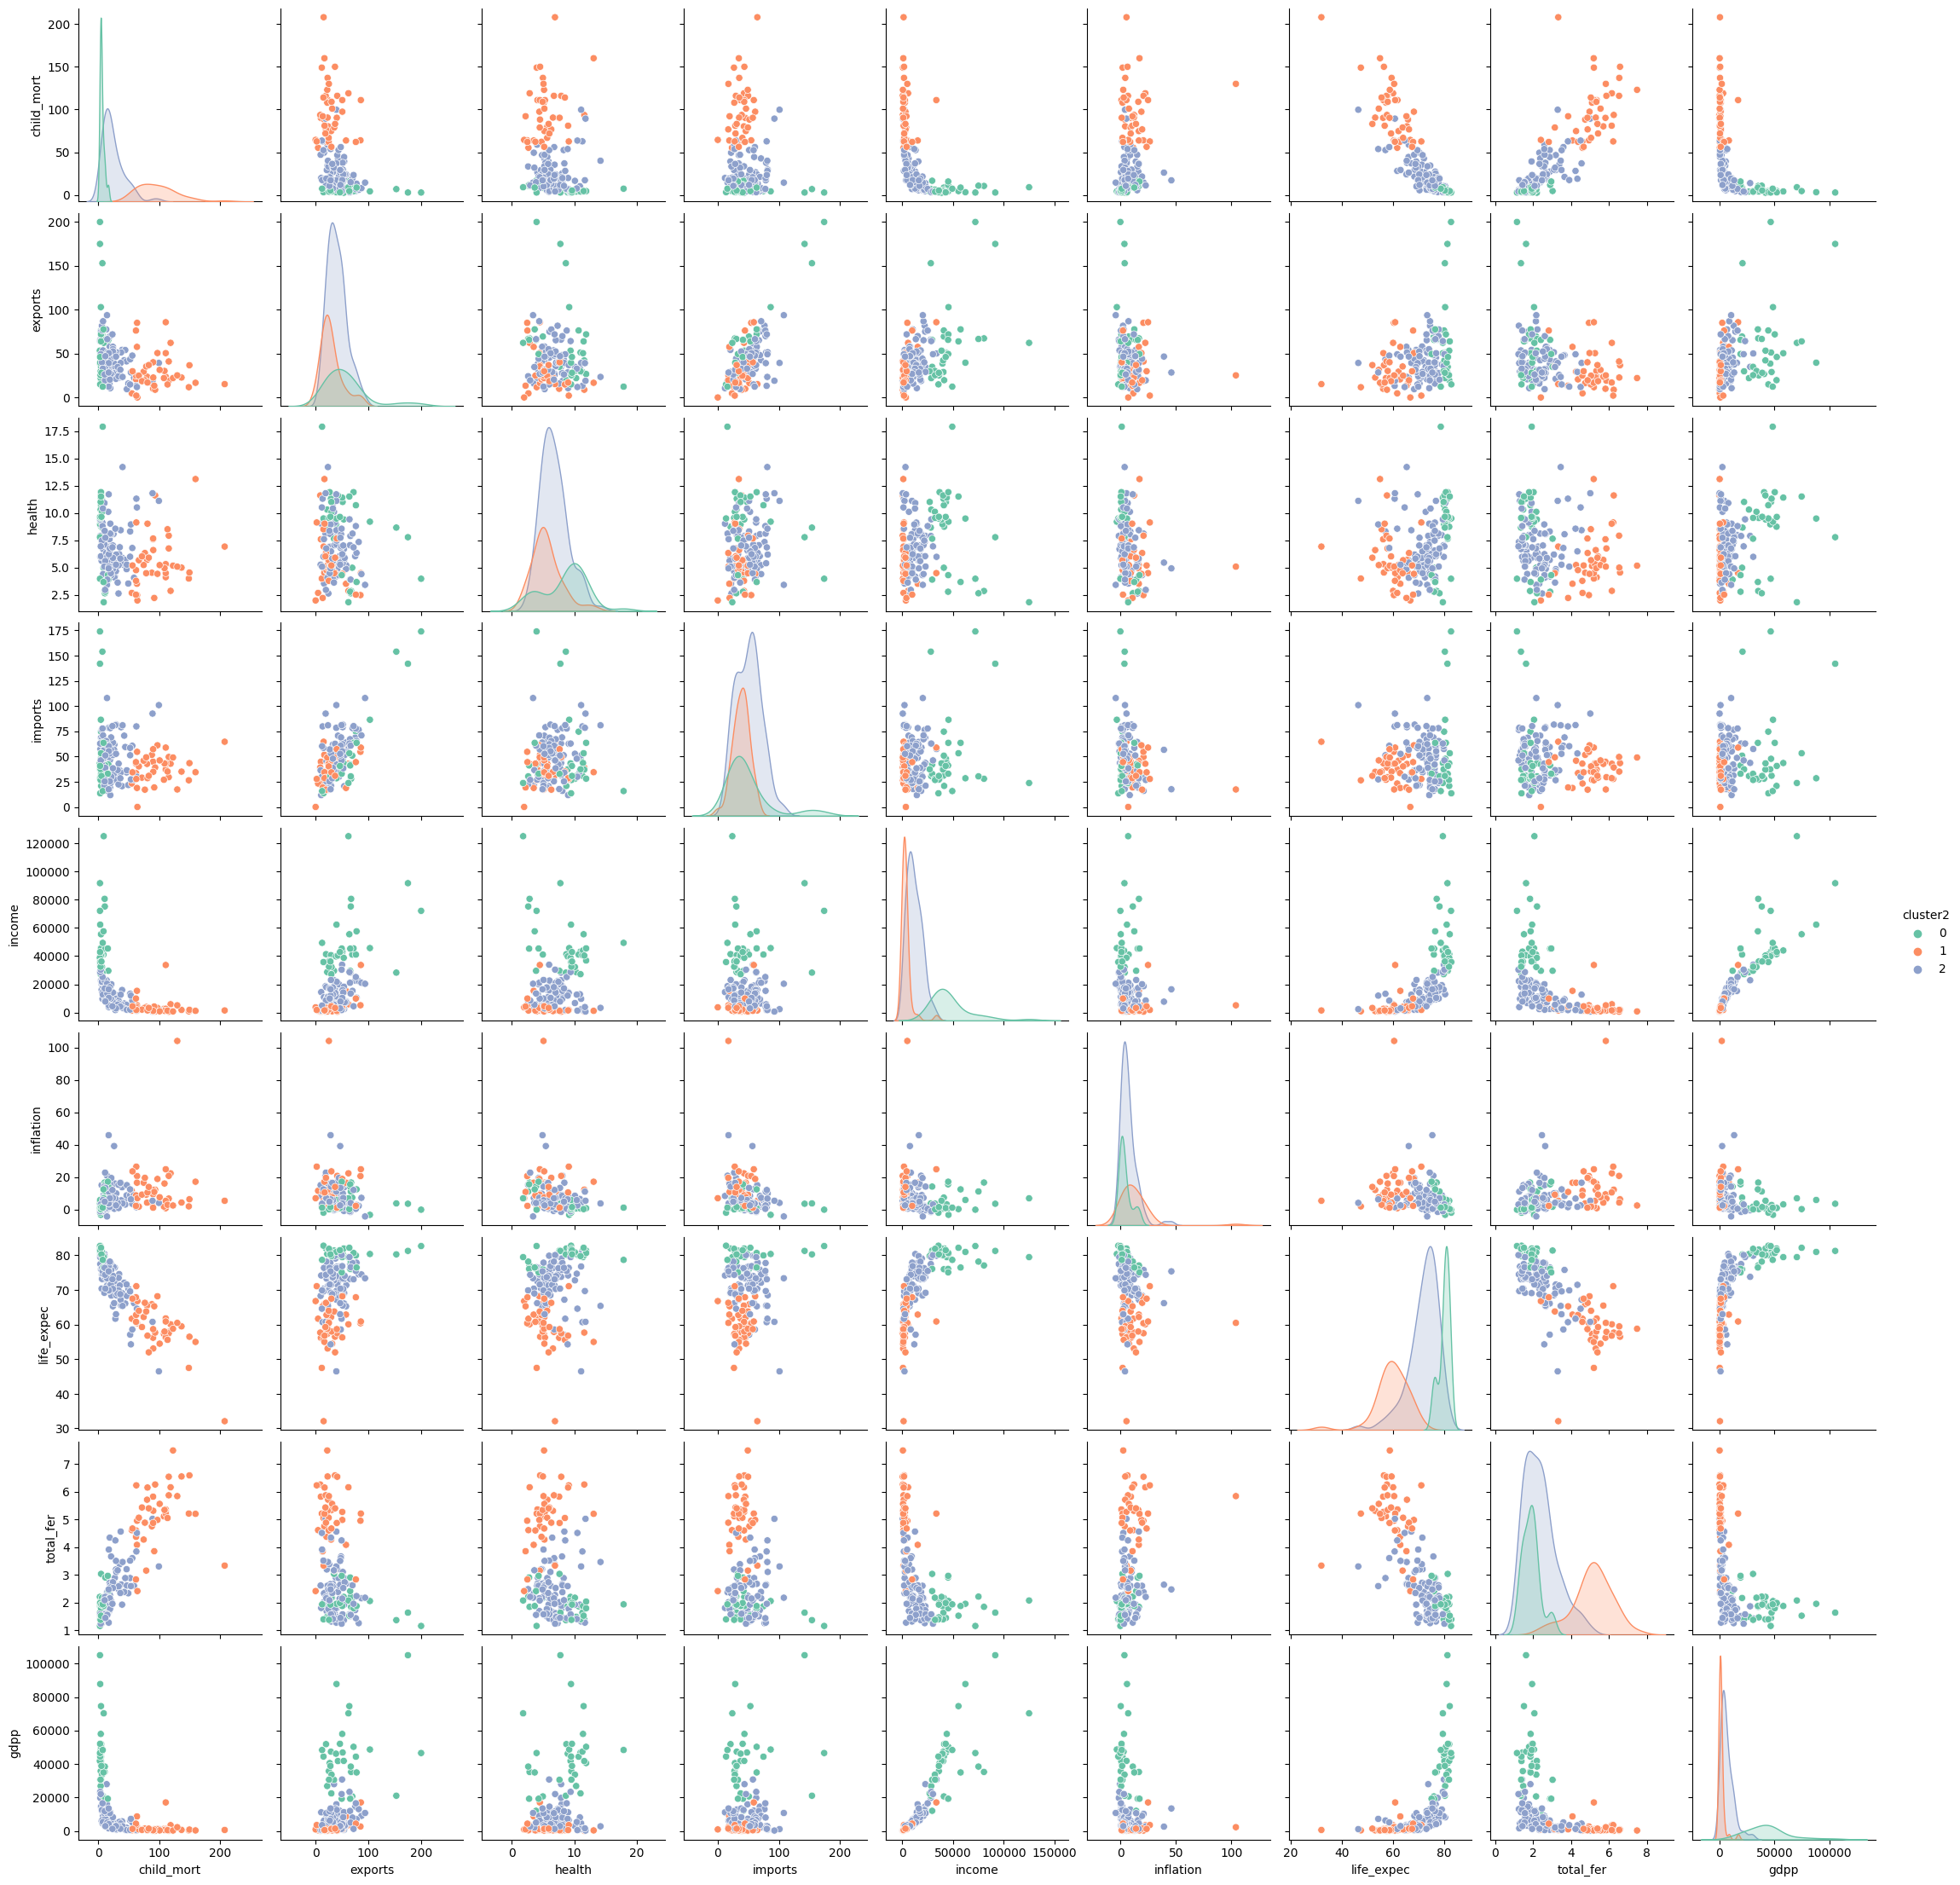

In [98]:
sns.pairplot(df2,hue='cluster2',palette='Set2')

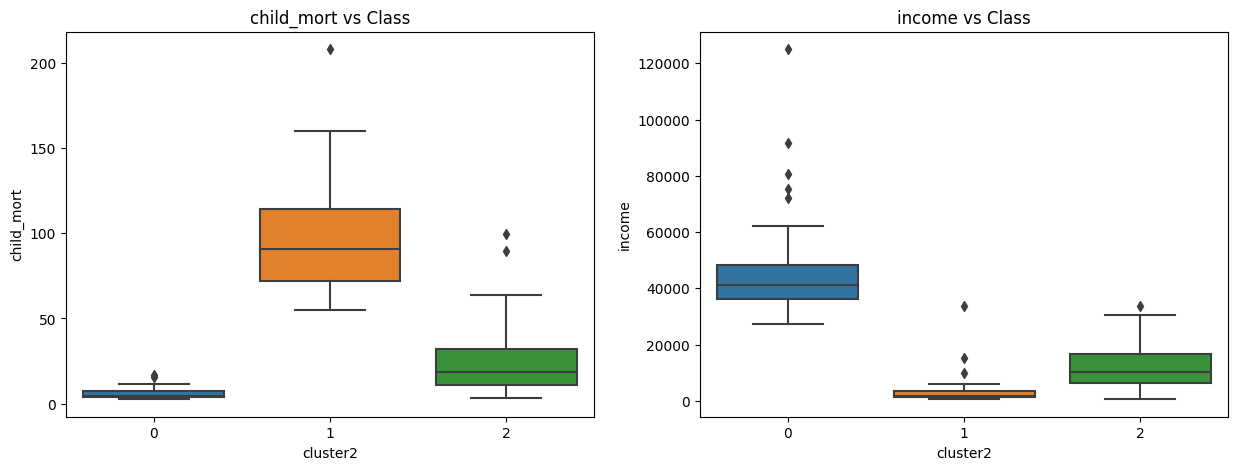

In [99]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster2', y = 'child_mort', data  = df2);
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster2', y = 'income', data  = df2);
plt.title('income vs Class')

plt.show()

In [100]:
from mpl_toolkits.mplot3d import Axes3D

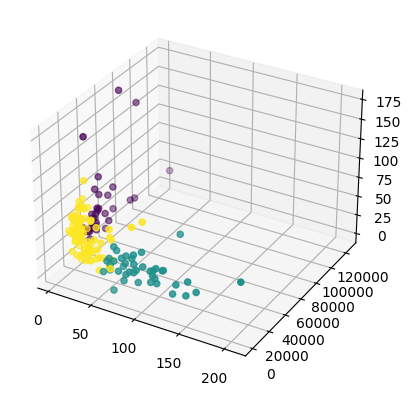

In [101]:
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
#colors = df['cluster2'].map({0:'red', 1:'blue', 2:'yellow'})
ax.scatter(df2['child_mort'],df2['income'],df2['imports'],c = df2['cluster2']);

In [102]:
df2['cluster2']=df2['cluster2'].map({0:'Might need help',1:'No need help',2:'Help needed'})


In [103]:
df2.insert(loc=0,column='country',value=list(df['country']))

In [104]:
df2.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan       90.20    10.00    7.58    44.90    1610   
1              Albania       16.60    28.00    6.55    48.60    9930   
2              Algeria       27.30    38.40    4.17    31.40   12900   
3               Angola      119.00    62.30    2.85    42.90    5900   
4  Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   

   inflation  life_expec  total_fer   gdpp      cluster2  
0       9.44       56.20       5.82    553  No need help  
1       4.49       76.30       1.65   4090   Help needed  
2      16.10       76.50       2.89   4460   Help needed  
3      22.40       60.10       6.16   3530  No need help  
4       1.44       76.80       2.13  12200   Help needed

In [105]:
fig = px.choropleth(df2[['country','cluster2']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df2['cluster2'],  
                    color_discrete_map = {'Help needed' : 'Red',
                                          'Might need Help' : 'Yellow',
                                          'No need help' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [106]:
df2.groupby('cluster2')['country'].count()

cluster2
Help needed        92
Might need help    34
No need help       41
Name: country, dtype: int64

### List of country needs help

In [107]:
list(df2[df2['cluster2']=='Help needed']['country'])


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kiribati',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Namibia',
 'Nepal',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Rwanda',
 'Samoa',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Slovenia',
 'So

========================================================================================================================